In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.gridspec import GridSpec
static_fields = xr.open_dataset(r'/nesi/project/niwa03712/group_shared/Emulator_training_data/ERA5_eval_ccam_12km.198110_NZ_Invariant.nc')

In [2]:
t_dset =xr.open_dataset('/nesi/project/niwa00018/ML_downscaling_CCAM/AI_large_ensemble/internal_variability_data/Multi_Model_Decomposition_tasmax_v250425.nc')
t_dset_le = xr.open_dataset('/nesi/project/niwa00018/ML_downscaling_CCAM/AI_large_ensemble/internal_variability_data/Multi_Model_Decomposition_tasmax_LE_IV_v250425.nc')

pr_dset =xr.open_dataset('/nesi/project/niwa00018/ML_downscaling_CCAM/AI_large_ensemble/internal_variability_data/Multi_Model_Decomposition_pr_v250425_percentage.nc')
pr_dset_le = xr.open_dataset('/nesi/project/niwa00018/ML_downscaling_CCAM/AI_large_ensemble/internal_variability_data/Multi_Model_Decomposition_pr_LE_IV_v250425_percentage.nc')

In [13]:
t_dset_le

<xarray.Dataset>
Dimensions:      (lon: 179, lat: 172, year: 106, GCM_variant: 59, time: 106)
Coordinates:
  * lon          (lon) float32 164.9 165.0 165.1 165.2 ... 183.7 183.9 184.0
  * lat          (lat) float32 -51.21 -51.11 -51.0 ... -33.07 -32.97 -32.86
  * year         (year) int64 1995 1996 1997 1998 1999 ... 2097 2098 2099 2100
  * GCM_variant  (GCM_variant) object 'ACCESS-ESM1-5_r10i1p1f1' ... 'CanESM5_...
    GCM          (GCM_variant) object 'ACCESS-ESM1-5' ... 'CanESM5'
  * time         (time) datetime64[ns] 1995-02-01 1996-02-01 ... 2100-02-01
    season       <U3 'DJF'
Data variables:
    TXX_IV       (GCM_variant, year, lat, lon) float64 -0.8527 -0.8324 ... 4.438
    DJF_IV       (GCM_variant, time, lat, lon) float64 ...

In [4]:
# t_rolling = t_dset_le.TXX_IV.rolling(year =10, min_periods =1).max().rolling(year =10, min_perid).mean()


In [12]:
t_rolling 

<xarray.DataArray 'TXX_IV' (GCM_variant: 59, year: 106, lat: 172, lon: 179)>
array([[[[       nan,        nan,        nan, ...,        nan,
                 nan,        nan],
         [       nan,        nan,        nan, ...,        nan,
                 nan,        nan],
         [       nan,        nan,        nan, ...,        nan,
                 nan,        nan],
         ...,
         [       nan,        nan,        nan, ...,        nan,
                 nan,        nan],
         [       nan,        nan,        nan, ...,        nan,
                 nan,        nan],
         [       nan,        nan,        nan, ...,        nan,
                 nan,        nan]],

        [[       nan,        nan,        nan, ...,        nan,
                 nan,        nan],
         [       nan,        nan,        nan, ...,        nan,
                 nan,        nan],
         [       nan,        nan,        nan, ...,        nan,
                 nan,        nan],
...
         [4.54298553, 4.57375946, 4.70027771, ..., 4.26385651,
          4.24875031, 4.21554413],
         [4.51382294, 4.54942932, 4.63064575, ..., 4.1876236 ,
          4.16077423, 4.13395386],
         [4.47293396, 4.49855042, 4.56544189, ..., 4.17733612,
          4.11278687, 4.11531372]],

        [[4.22040253, 4.23294525, 4.21540375, ..., 4.43355713,
          4.44065094, 4.41197357],
         [4.18683319, 4.17954254, 4.15519257, ..., 4.44297638,
          4.46499786, 4.45001526],
         [4.27467651, 4.27878418, 4.2366394 , ..., 4.47345886,
          4.4953598 , 4.47932892],
         ...,
         [4.60738983, 4.64018097, 4.76237793, ..., 4.25537872,
          4.24129181, 4.21343536],
         [4.57654877, 4.61378479, 4.69391174, ..., 4.17662201,
          4.1532486 , 4.13317566],
         [4.52795715, 4.5592804 , 4.62576904, ..., 4.16858063,
          4.10785828, 4.1177887 ]]]])
Coordinates:
  * lon          (lon) float32 164.9 165.0 165.1 165.2 ... 183.7 183.9 184.0
  * lat          (lat) float32 -51.21 -51.11 -51.0 ... -33.07 -32.97 -32.86
  * year         (year) int64 1995 1996 1997 1998 1999 ... 2097 2098 2099 2100
  * GCM_variant  (GCM_variant) object 'ACCESS-ESM1-5_r10i1p1f1' ... 'CanESM5_...
    GCM          (GCM_variant) object 'ACCESS-ESM1-5' ... 'CanESM5'
    season       <U3 'DJF'

In [ ]:
t_hist = t_rolling.sel(year = slice(1986, 2005)).mean("year")
t_future = t_rolling.sel(year = slice(2080, 2099)).mean("year")
t_signal = t_future - t_hist

In [ ]:
t_signal.sel(GCM_variant = t_signal.GCM =='CanESM5').isel(GCM_variant =0).plot()

In [5]:
static_fields = xr.open_dataset(r'/nesi/project/niwa03712/group_shared/Emulator_training_data/ERA5_eval_ccam_12km.198110_NZ_Invariant.nc')

In [6]:
merged_dset = merged_dset_updated = xr.open_dataset(r'/nesi/project/niwa00018/ML_downscaling_CCAM/AI_large_ensemble/Low_res_ACCESS-ESM1-5_ensemble.nc')
merged_dset= merged_dset.interp(lat = static_fields.lat, lon = static_fields.lon, method ='nearest')

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [7]:
merged_dset['TXX_IV'] = merged_dset['TXx'] - merged_dset['TXx'].sel(year = slice("1995","2014")).mean("year")

In [8]:
merged_dset['RX1Day_IV'] = 100*(merged_dset['Rx1day'] - merged_dset['Rx1day'].sel(year = slice("1995","2014")).mean("year"))/merged_dset['Rx1day'].sel(year = slice("1995","2014")).mean("year")

In [9]:



def compute_decomposition_annual(model_scenario, IV_ensemble, merged_dset, varname = "TXX_MME", dim ="year", degree =2, varname_iv = "TXX_IV"):
    
    try:
        model_scenario['time'] = model_scenario.time.dt.year
    except:
        print("passed")
    try:
        IV_ensemble['time'] = IV_ensemble.time.dt.year
    except:
        print("passed")
        # convert time to year if there is an error
        
    # compute a decadal means of the quantity
    #with ProgressBar():
    model_scenario = model_scenario[varname].rolling({dim: 10}, min_periods =6).mean().dropna(dim)
    
    fitted_uncertainty = model_scenario.isel({dim: slice(1, -1)}).polyfit(dim, degree, skipna =True)
    print("here")
    fitted_curve = xr.polyval(model_scenario[dim], fitted_uncertainty.polyfit_coefficients)
    residuals = model_scenario- fitted_curve
    # residuals from the model uncertainty
    I_model = residuals.var([dim]).mean(["GCM","ssp"])
    M = fitted_curve.var("GCM").mean("ssp")
    S = fitted_curve.mean("GCM").var("ssp")
    
    # IV Uncertainty
    IV_ensemble = IV_ensemble[varname_iv].rolling({dim: 10}, min_periods =6).mean().dropna(dim)
    #ens_low_res_raw_mean= merged_dset[varname_iv].rolling(year =10, min_periods =6).mean().mean("GCM_variant")
    #ens_raw_mean= IV_ensemble.sel(GCM_variant = (IV_ensemble.GCM == 'ACCESS-ESM1-5')).mean("GCM_variant")
    #D_uncertainty = abs(ens_low_res_raw_mean - ens_raw_mean)**2

    fitted_uncertainty_IV = IV_ensemble.isel({dim: slice(1, -1)}).polyfit(dim, degree, skipna=True)
    fitted_curve_IV = xr.polyval(IV_ensemble[dim], fitted_uncertainty_IV.polyfit_coefficients)
    
    I_trend_A = fitted_curve_IV.sel(GCM_variant = (IV_ensemble.GCM == 'ACCESS-ESM1-5')).var("GCM_variant")
    I_trend_C = fitted_curve_IV.sel(GCM_variant = (IV_ensemble.GCM == 'CanESM5')).var("GCM_variant")
    I_raw_A = IV_ensemble.sel(GCM_variant = (IV_ensemble.GCM == 'ACCESS-ESM1-5')).var("GCM_variant")
    I_raw_C = IV_ensemble.sel(GCM_variant = (IV_ensemble.GCM == 'CanESM5')).var("GCM_variant")

    
    return I_model, M, S, I_trend_A, I_trend_C, I_raw_A, I_raw_C, fitted_curve#, D_uncertainty



    
    

In [10]:

def compute_decomposition_decadal(model_scenario, IV_ensemble, merged_dset, varname = "TXX_MME", dim ="year", degree =2, varname_iv = "TXX_IV"):
    
    try:
        model_scenario['time'] = model_scenario.time.dt.year
    except:
        print("passed")
    try:
        IV_ensemble['time'] = IV_ensemble.time.dt.year
    except:
        print("passed")
        # convert time to year if there is an error
        
    # compute a decadal means of the quantity
    #with ProgressBar():
    model_scenario = model_scenario[varname].rolling({dim: 10}, min_periods =6).max().dropna(dim)
    # An additional smoothing step
    model_scenario = model_scenario.rolling({dim: 10}, min_periods =6).mean().dropna(dim)
    fitted_uncertainty = model_scenario.isel({dim: slice(1, -1)}).polyfit(dim, degree, skipna =True)
    print("here")
    fitted_curve = xr.polyval(model_scenario[dim], fitted_uncertainty.polyfit_coefficients)
    residuals = model_scenario- fitted_curve
    # residuals from the model uncertainty
    I_model = residuals.var([dim,"ssp"]).mean(["GCM"])
    M = fitted_curve.var("GCM").mean("ssp")
    S = fitted_curve.mean("GCM").var("ssp")
    
    # IV Uncertainty
    IV_ensemble = IV_ensemble[varname_iv].rolling({dim: 10}, min_periods =6).max().dropna(dim)
    IV_ensemble = IV_ensemble.rolling({dim: 10}, min_periods =6).mean()
  

    #ens_low_res_raw_mean= merged_dset[varname_iv].rolling(year =10, min_periods =6).max().rolling({year: 10}, min_periods =6).mean().mean("GCM_variant")
    #ens_raw_mean= IV_ensemble.sel(GCM_variant = (IV_ensemble.GCM == 'ACCESS-ESM1-5')).mean("GCM_variant")
    #D_uncertainty = abs(ens_low_res_raw_mean - ens_raw_mean)**2

    fitted_uncertainty_IV = IV_ensemble.isel({dim: slice(1, -1)}).polyfit(dim, degree, skipna=True)
    fitted_curve_IV = xr.polyval(IV_ensemble[dim], fitted_uncertainty_IV.polyfit_coefficients)
    
    I_trend_A = fitted_curve_IV.sel(GCM_variant = (IV_ensemble.GCM == 'ACCESS-ESM1-5')).var("GCM_variant")
    I_trend_C = fitted_curve_IV.sel(GCM_variant = (IV_ensemble.GCM == 'CanESM5')).var("GCM_variant")
    I_raw_A = IV_ensemble.sel(GCM_variant = (IV_ensemble.GCM == 'ACCESS-ESM1-5')).var("GCM_variant")
    I_raw_C = IV_ensemble.sel(GCM_variant = (IV_ensemble.GCM == 'CanESM5')).var("GCM_variant")
    
    return I_model, M, S, I_trend_A, I_trend_C, I_raw_A, I_raw_C, fitted_curve#, D_uncertainty


In [210]:
from matplotlib.colors import LinearSegmentedColormap
import earthpy.spatial as es
hillshade_dset = xr.open_dataset(r'/nesi/project/niwa00018/gibsonp/dload_data/global_topo_1km/topo_NZ_1km.nc')
hillshade = es.hillshade(hillshade_dset.topo.values, azimuth=0, altitude=45)
hillshade_dset['hillshade'] = (('Y','X'), hillshade)


#fig.savefig(r'/nesi/project/niwa00018/ML_downscaling_CCAM/AI_large_ensemble/Rx1day_spatial_figre_dfj.pdf', dpi =500, bbox_inches ='tight')
regions = {'Auckland': (-36.7928, 174.6131),
 'Wellington': (-41.2924, 174.7787),
 'Christchurch': (-43.532, 172.6366)}
import numpy as np
import cartopy.feature as cfeature
from matplotlib.colors import LinearSegmentedColormap

# Define custom colormap colors (approximated from the image)
colors = [    # Slightly lighter green
    (0.0,  "yellowgreen"), # Yellowish green
    (0.25,  "yellow"),     # Bright yellow
    (0.5, "orange"),     # Warm orange
    (0.75,  "saddlebrown"), # Reddish-brown
    (1.0,  "white")       # Lightest color on the far right
]

# Create the colormap
custom_cmap = LinearSegmentedColormap.from_list("custom_colormap", colors)

fig = plt.figure(figsize=(16, 14))
ax_map = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax_map.set_extent([160, 180, -53, -28], crs=ccrs.PlateCarree())
hillshade_dset.hillshade.plot(ax = ax_map, transform = ccrs.PlateCarree(), cmap ='Greys_r', alpha =0.475, levels =50, zorder =3, add_colorbar =False)
hillshade_dset.topo.plot(ax = ax_map, transform = ccrs.PlateCarree(), cmap =custom_cmap, alpha =0.22, levels =50, zorder =4, add_colorbar =False, vmax =1500)
# Add map features
ax_map.add_feature(cfeature.COASTLINE.with_scale('10m'), linewidth=1, zorder =4, fc ='gray')
ax_map.add_feature(cfeature.LAND, linewidth=1, zorder =4, fc ='gray', alpha =0.1)
ax_map.add_feature(cfeature.BORDERS, linestyle=':', zorder =4)
ax_map.set_frame_on(False)
for region, (lat, lon) in regions.items():
    if region == 'Auckland':
        ax_map.text(lon-1.55, lat-0.45, region, transform =ccrs.PlateCarree(), fontsize =16, zorder =12, color ='k')#, weight ='bold')
    else:
    #x_violin.
        ax_map.text(lon+0.8, lat-0.45, region, transform =ccrs.PlateCarree(), fontsize =16, zorder =12, color ='k')#, weight ='bold')
    ax_map.scatter(lon, lat, transform =ccrs.PlateCarree(), s=150, color ='k', marker ='o', zorder=14)
ax_map.set_extent([166, 180, -48.5, -33.5], crs = ccrs.PlateCarree())
fig.savefig('/nesi/project/niwa00018/ML_downscaling_CCAM/AI_large_ensemble/figures/Hawkins_Sutton/NZ_topography.png', dpi =500, bbox_inchest ='tight')

/tmp/ipykernel_29564/1953572274.py:35: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox_inchest" which is no longer supported as of 3.3 and will become an error in 3.6
  fig.savefig('/nesi/project/niwa00018/ML_downscaling_CCAM/AI_large_ensemble/figures/Hawkins_Sutton/NZ_topography.png', dpi =500, bbox_inchest ='tight')
/nesi/project/niwa00018/rampaln/envs/ml_env_v2/lib/python3.8/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


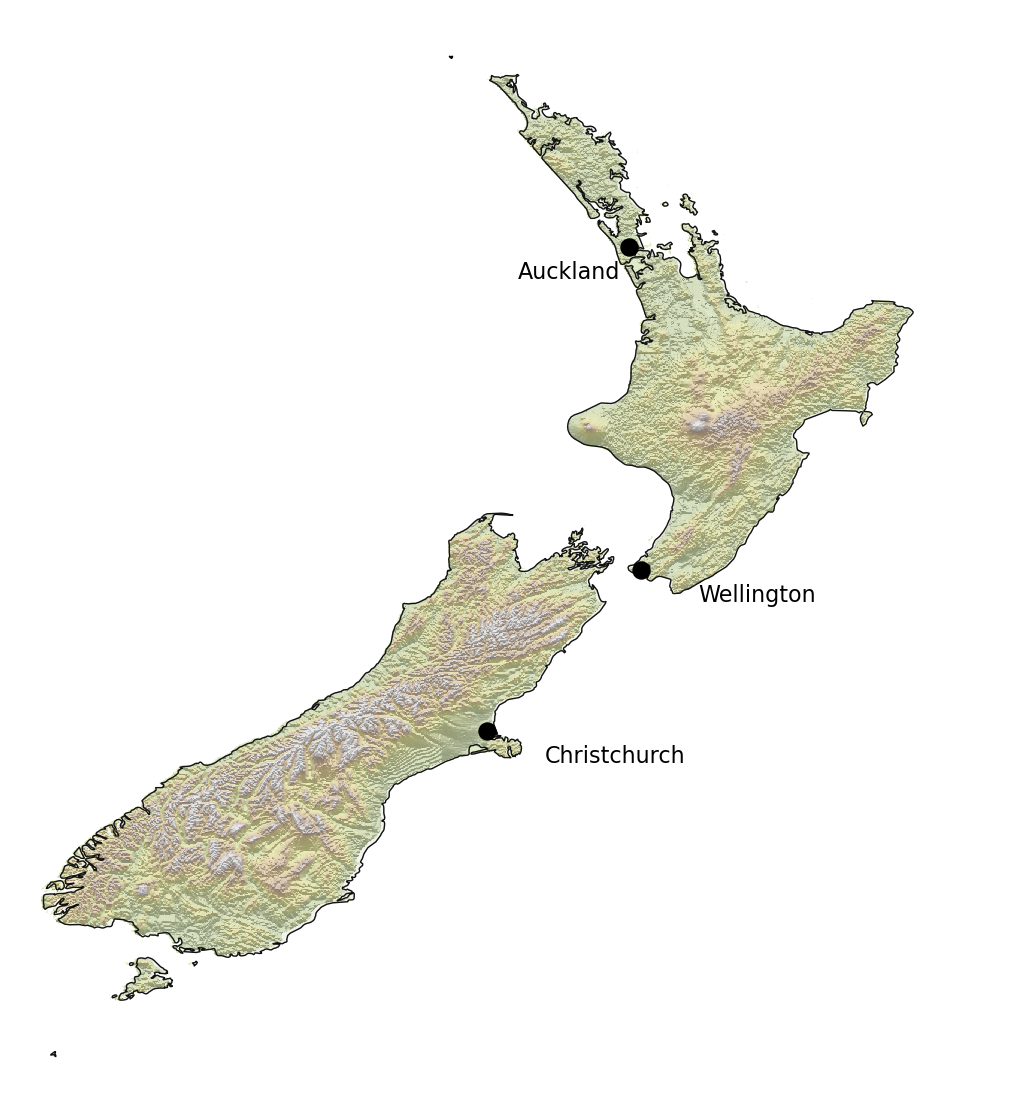

/tmp/ipykernel_29564/2671847459.py:17: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox_inchest" which is no longer supported as of 3.3 and will become an error in 3.6
  fig.savefig('/nesi/project/niwa00018/ML_downscaling_CCAM/AI_large_ensemble/figures/Hawkins_Sutton/figure_axes.png', dpi =500, bbox_inchest ='tight')


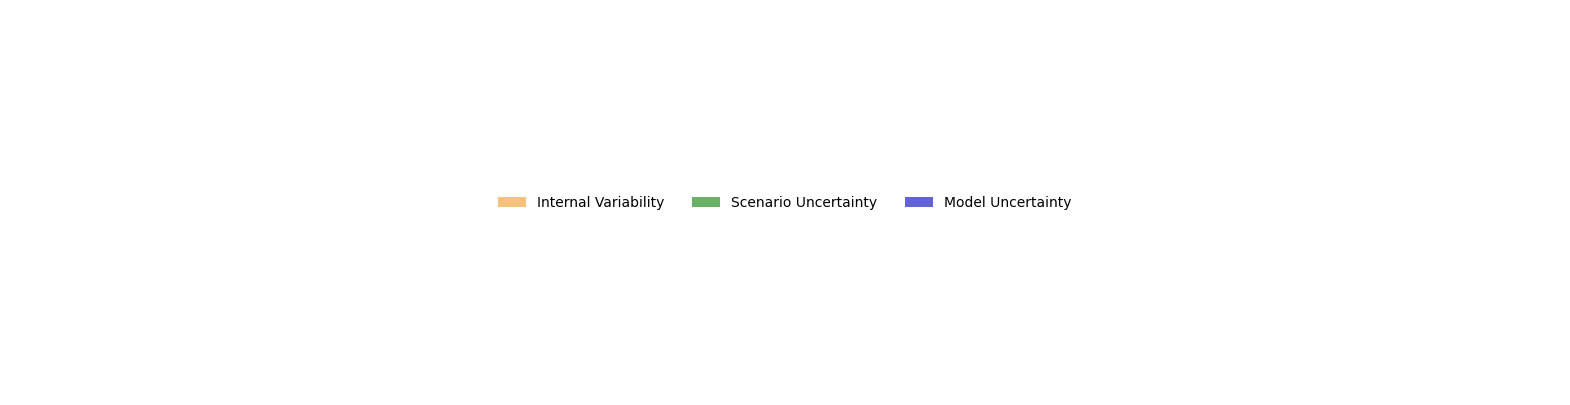

In [228]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# Define the colors and labels for the legend
colors = ['#f4c27a', '#69b06a', '#6363d9']
labels = ['Internal Variability', 'Scenario Uncertainty', 'Model Uncertainty']

# Create a new figure for the legend only
fig, ax = plt.subplots(figsize=(20, 5))
legend_elements = [Patch(facecolor=color, label=label) for color, label in zip(colors, labels)]
legend = ax.legend(handles=legend_elements, loc='center', frameon=False, ncol=3)

# Remove axes
ax.axis('off')


fig.savefig('/nesi/project/niwa00018/ML_downscaling_CCAM/AI_large_ensemble/figures/Hawkins_Sutton/figure_axes.png', dpi =500, bbox_inchest ='tight')

In [11]:
I_model_rx1day, M_rx1day, S_rx1day, I_trend_A_rx1day, I_trend_C_rx1day, I_raw_A_rx1day, I_raw_C_rx1day,fitted_rx1day = compute_decomposition_annual(pr_dset.where(static_fields.orog>0, np.nan).mean(["lat","lon"]),
                                                                                              pr_dset_le.where(static_fields.orog>0, np.nan).mean(["lat","lon"]),merged_dset.where(static_fields.orog>0, np.nan).mean(["lat","lon"]), varname = "Rx1day_MME", dim ="year", degree =2, varname_iv = "RX1Day_IV")
I_model_rx1day_regional, M_rx1day_regional, S_rx1day_regional, I_trend_A_rx1day_regional, I_trend_C_rx1day_regional, I_raw_A_rx1day_regional, I_raw_C_rx1day_regional,fitted_T_rx1day_regional = compute_decomposition_annual(pr_dset,
                                                                                              pr_dset_le,merged_dset, varname = "Rx1day_MME", dim ="year", degree =2, varname_iv = "RX1Day_IV")

here
here


In [12]:
I_model_txx, M_txx, S_txx, I_trend_A_txx, I_trend_C_txx, I_raw_A_txx, I_raw_C_txx,fitted_txx = compute_decomposition_annual(t_dset.where(static_fields.orog>0, np.nan).mean(["lat","lon"]),
                                                                                              t_dset_le.where(static_fields.orog>0, np.nan).mean(["lat","lon"]),merged_dset.where(static_fields.orog>0, np.nan).mean(["lat","lon"]), varname = "TXX_MME", dim ="year", degree =2, varname_iv = "TXX_IV")
I_model_txx_regional, M_txx_regional, S_txx_regional, I_trend_A_txx_regional, I_trend_C_txx_regional, I_raw_A_txx_regional, I_raw_C_txx_regional,fitted_T_txx_regional = compute_decomposition_annual(t_dset,
                                                                                              t_dset_le,merged_dset, varname = "TXX_MME", dim ="year", degree =2, varname_iv = "TXX_IV")

here
here


In [13]:
I_model_rx1day_max, M_rx1day_max, S_rx1day_max, I_trend_A_rx1day_max, I_trend_C_rx1day_max, I_raw_A_rx1day_max, I_raw_C_rx1day_max,fitted_rx1day_max = compute_decomposition_decadal(pr_dset.where(static_fields.orog>0, np.nan).mean(["lat","lon"]),
                                                                                              pr_dset_le.where(static_fields.orog>0, np.nan).mean(["lat","lon"]), merged_dset, varname = "Rx1day_MME", dim ="year", degree =2, varname_iv = "RX1Day_IV")
I_model_rx1day_regional_max, M_rx1day_regional_max, S_rx1day_regional_max, I_trend_A_rx1day_regional_max, I_trend_C_rx1day_regional_max, I_raw_A_rx1day_regional_max, I_raw_C_rx1day_regional_max,fitted_T_rx1day_regional_max = compute_decomposition_decadal(pr_dset,
                                                                                              pr_dset_le,merged_dset, varname = "Rx1day_MME", dim ="year", degree =2, varname_iv = "RX1Day_IV")

passed
passed
here
passed
passed
here


In [14]:
I_model_txx_max, M_txx_max, S_txx_max, I_trend_A_txx_max, I_trend_C_txx_max, I_raw_A_txx_max, I_raw_C_txx_max,fitted_txx_max = compute_decomposition_decadal(t_dset.where(static_fields.orog>0, np.nan).mean(["lat","lon"]),
                                                                                              t_dset_le.where(static_fields.orog>0, np.nan).mean(["lat","lon"]), merged_dset, varname = "TXX_MME", dim ="year", degree =2, varname_iv = "TXX_IV")
I_model_txx_regional_max, M_txx_regional_max, S_txx_regional_max, I_trend_A_txx_regional_max, I_trend_C_txx_regional_max, I_raw_A_txx_regional_max, I_raw_C_txx_regional_max,fitted_T_txx_regional_max = compute_decomposition_decadal(t_dset,
                                                                                              t_dset_le, merged_dset, varname = "TXX_MME", dim ="year", degree =2, varname_iv = "TXX_IV")

passed
passed
here
passed
passed
here


In [15]:
def create_fraction_arr(I, S, M, I_static):
    T = S + M + I
    S_ = (S/T).to_dataset(name = 'Scenario')
    I_ = (I/T).to_dataset(name = 'Internal Variability')
    M_ = (M/T).to_dataset(name = 'Model')
    T = T.to_dataset(name = 'Total')
    I_static = I_static.to_dataset(name = 'Static I')
    merged = xr.merge([S_, I_, M_, T, I_static])
    return merged
    

In [ ]:
I_model_txx_regional_max

In [16]:
merged_tx10 = create_fraction_arr(1/2*(I_raw_C_txx_regional_max + I_raw_A_txx_regional_max), S_txx_regional_max, M_txx_regional_max, I_model_txx_regional_max)
merged_rx10 = create_fraction_arr(1/2*(I_raw_C_rx1day_regional_max + I_raw_A_rx1day_regional_max), S_rx1day_regional_max, M_rx1day_regional_max, I_model_rx1day_regional_max)
merged_rx1day = create_fraction_arr(1/2*(I_raw_C_rx1day_regional + I_raw_A_rx1day_regional), S_rx1day_regional, M_rx1day_regional, I_model_rx1day_regional)
merged_txx = create_fraction_arr(1/2*(I_raw_C_txx_regional + I_raw_A_txx_regional), S_txx_regional, M_txx_regional, I_model_txx_regional)

In [17]:
merged_tx10_av = create_fraction_arr(1/2*(I_raw_C_txx_max + I_raw_A_txx_max), S_txx_max, M_txx_max, I_model_txx_max)
merged_rx10_av = create_fraction_arr(1/2*(I_raw_C_rx1day_max + I_raw_A_rx1day_max), S_rx1day_max, M_rx1day_max,I_model_rx1day_max)
merged_rx1day_av = create_fraction_arr(1/2*(I_raw_C_rx1day + I_raw_A_rx1day), S_rx1day, M_rx1day,  I_model_rx1day)
merged_txx_av = create_fraction_arr(1/2*(I_raw_C_txx + I_raw_A_txx), S_txx, M_txx, I_model_txx)

In [19]:
import matplotlib.gridspec as gridspec
import cartopy.crs as ccrs

ERROR 1: PROJ: proj_create_from_database: Open of /nesi/project/niwa00018/rampaln/envs/ml_env_v2/share/proj failed


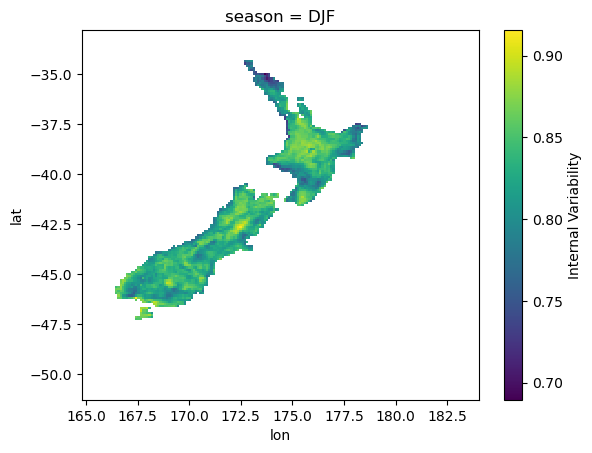

In [157]:
merged_txx['Internal Variability'].sel(year =slice(2015,2025)).mean("year").where(static_fields.orog>0, np.nan).plot()

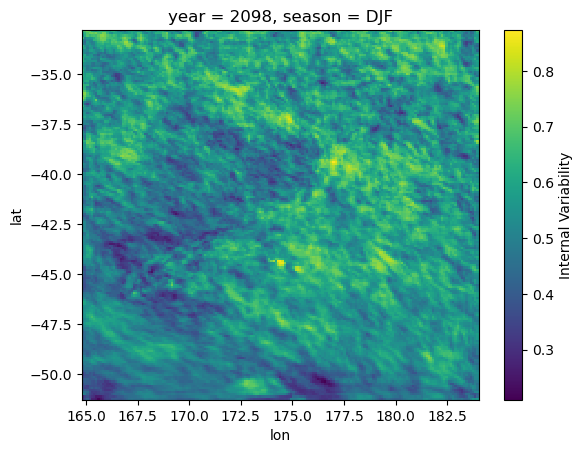

In [435]:
merged_rx1day.isel(year =-3)['Internal Variability'].plot()

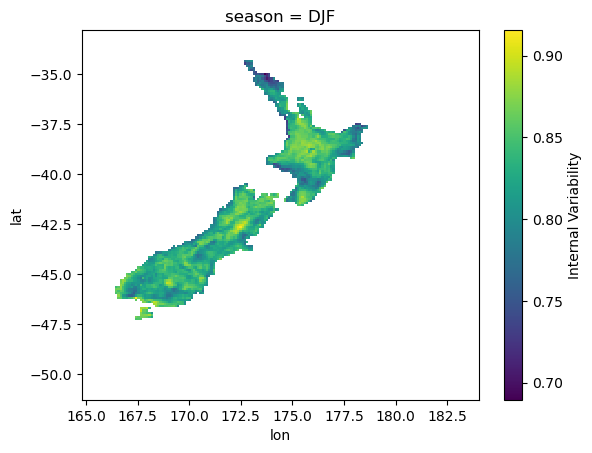

In [165]:
merged_txx['Internal Variability'].sel(year =slice(2015,2025)).mean("year").where(static_fields.orog>0, np.nan).plot()

Bbox(x0=0.125, y0=0.22263393136017776, x1=0.2693511450381679, y1=0.47247245161854534)


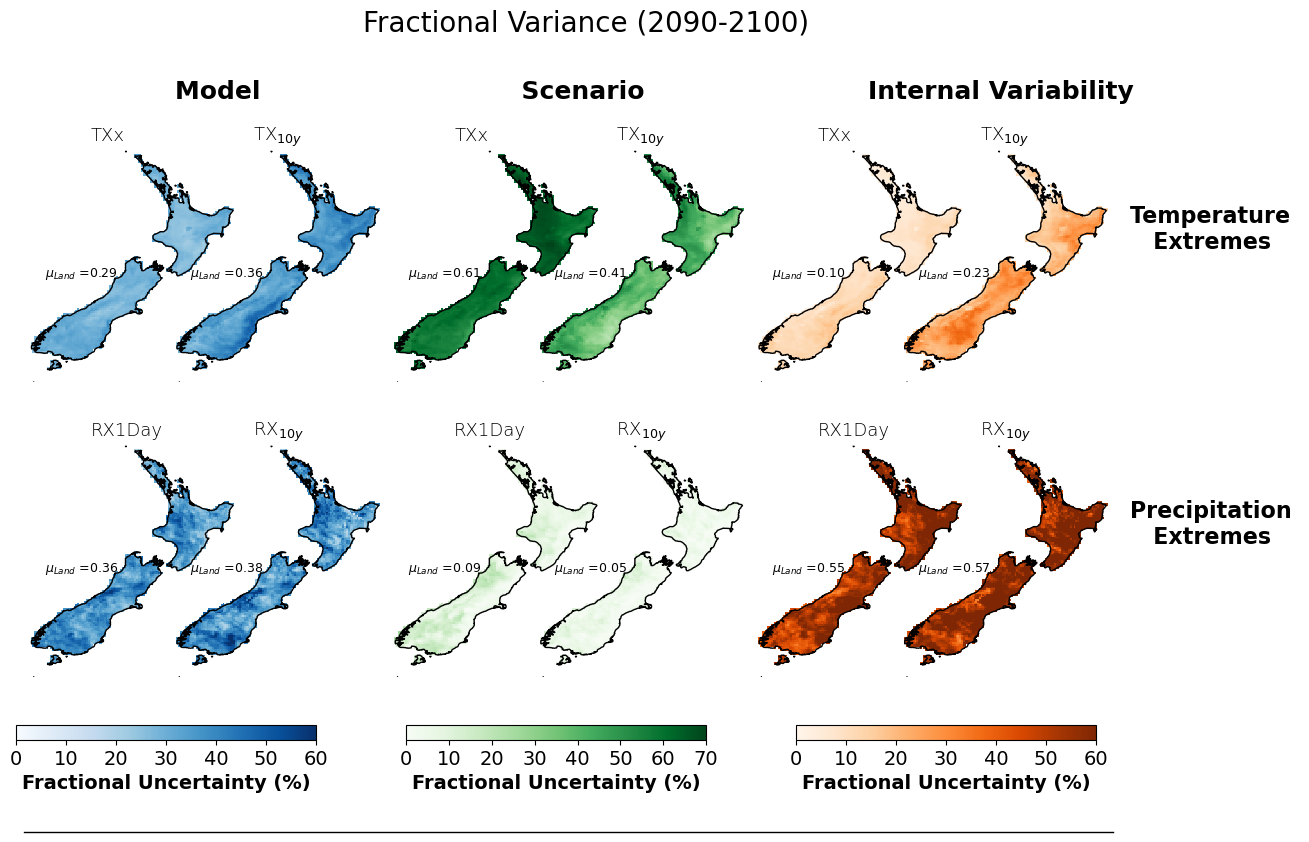

In [25]:


fig = plt.figure(figsize=(15, 10))
#gs1 = gridspec.GridSpec(16, 20, hspace=-35, wspace=0.025)
gs = gridspec.GridSpec(4, 16, hspace=-0.55, wspace=0.025)
ax1 = fig.add_subplot(gs[0:2,0:3], projection=ccrs.PlateCarree(central_longitude =171.77))
ax2 = fig.add_subplot(gs[0:2,2:5], projection=ccrs.PlateCarree(central_longitude =171.77))
ax3 = fig.add_subplot(gs[0:2,5:8], projection=ccrs.PlateCarree(central_longitude =171.77))
ax4 = fig.add_subplot(gs[0:2,7:10], projection=ccrs.PlateCarree(central_longitude =171.77))
ax5 = fig.add_subplot(gs[0:2,10:13], projection=ccrs.PlateCarree(central_longitude =171.77))
ax6 = fig.add_subplot(gs[0:2,12:15], projection=ccrs.PlateCarree(central_longitude =171.77))


ax11 = fig.add_subplot(gs[2:4,0:3], projection=ccrs.PlateCarree(central_longitude =171.77))
ax22 = fig.add_subplot(gs[2:4,2:5], projection=ccrs.PlateCarree(central_longitude =171.77))
ax33 = fig.add_subplot(gs[2:4,5:8], projection=ccrs.PlateCarree(central_longitude =171.77))
ax44 = fig.add_subplot(gs[2:4,7:10], projection=ccrs.PlateCarree(central_longitude =171.77))
ax55 = fig.add_subplot(gs[2:4,10:13], projection=ccrs.PlateCarree(central_longitude =171.77))
ax66 = fig.add_subplot(gs[2:4,12:15], projection=ccrs.PlateCarree(central_longitude =171.77))


v_max_s =0.7
v_max_I = 0.6
v_max_m = 0.6


axes = [ax11, ax22, ax33, ax44, ax55, ax66, ax1, ax2, ax3, ax4, 
        ax5, ax6]

def plot_with_mean(ax, data_array, cmap, vmin, vmax):
    im = data_array.plot(ax=ax, cmap=cmap, vmin=vmin, vmax=vmax,
                         transform=ccrs.PlateCarree(), add_colorbar=False)
    mean_val = data_array.mean().item()
    ax.text(167.25, -41, '$\mu_{Land}$' +f' ={mean_val:.2f}', transform=ccrs.PlateCarree(),
            fontsize=9, verticalalignment='top', color='black')
    return im

# === RX1DAY: 2090–2100 ===
plot_with_mean(ax11, merged_rx1day['Model'].sel(year=slice(2090, 2100)).mean("year").where(static_fields.orog > 0, np.nan),
               cmap='Blues', vmin=0, vmax=v_max_m)
plot_with_mean(ax33, merged_rx1day['Scenario'].sel(year=slice(2090, 2100)).mean("year").where(static_fields.orog > 0, np.nan),
               cmap='Greens', vmin=0, vmax=v_max_s)
plot_with_mean(ax55, merged_rx1day['Internal Variability'].sel(year=slice(2090, 2100)).mean("year").where(static_fields.orog > 0, np.nan),
               cmap='Oranges', vmin=0, vmax=v_max_I)

# === RX10: 2090–2100 ===
plot_with_mean(ax22, merged_rx10['Model'].sel(year=slice(2090, 2100)).mean("year").where(static_fields.orog > 0, np.nan),
               cmap='Blues', vmin=0, vmax=v_max_m)
plot_with_mean(ax44, merged_rx10['Scenario'].sel(year=slice(2090, 2100)).mean("year").where(static_fields.orog > 0, np.nan),
               cmap='Greens', vmin=0, vmax=v_max_s)
plot_with_mean(ax66, merged_rx10['Internal Variability'].sel(year=slice(2090, 2100)).mean("year").where(static_fields.orog > 0, np.nan),
               cmap='Oranges', vmin=0, vmax=v_max_I)



# === TXx: 2090–2100 ===
plot_with_mean(ax1, merged_txx['Model'].sel(year=slice(2090, 2100)).mean("year").where(static_fields.orog > 0, np.nan),
               cmap='Blues', vmin=0, vmax=v_max_m)
plot_with_mean(ax3, merged_txx['Scenario'].sel(year=slice(2090, 2100)).mean("year").where(static_fields.orog > 0, np.nan),
               cmap='Greens', vmin=0, vmax=v_max_s)
plot_with_mean(ax5, merged_txx['Internal Variability'].sel(year=slice(2090, 2100)).mean("year").where(static_fields.orog > 0, np.nan),
               cmap='Oranges', vmin=0, vmax=v_max_I)

# === TX10: 2090–2100 ===
cs1 = plot_with_mean(ax2, merged_tx10['Model'].sel(year=slice(2090, 2100)).mean("year").where(static_fields.orog > 0, np.nan),
               cmap='Blues', vmin=0, vmax=v_max_m)
cs2 = plot_with_mean(ax4, merged_tx10['Scenario'].sel(year=slice(2090, 2100)).mean("year").where(static_fields.orog > 0, np.nan),
               cmap='Greens', vmin=0, vmax=v_max_s)
cs3 =plot_with_mean(ax6, merged_tx10['Internal Variability'].sel(year=slice(2090, 2100)).mean("year").where(static_fields.orog > 0, np.nan),
               cmap='Oranges', vmin=0, vmax=v_max_I)



[axi.set_extent([166, 179, -48, -33], crs = ccrs.PlateCarree()) for axi in axes]
[axi.set_title(' ') for axi in axes]
[axi.coastlines('10m') for axi in axes]
[axi.set_frame_on(False) for axi in axes]
ax1.text(173, -31, '    Model', fontsize =18, weight='bold', transform = ccrs.PlateCarree())
ax3.text(173, -31, '  Scenario', fontsize =18, weight='bold', transform = ccrs.PlateCarree())
ax5.text(173, -31, 'Internal Variability', fontsize =18, weight='bold', transform = ccrs.PlateCarree())
ax14 = fig.add_axes([0.12, 0.16, 0.2, 0.015])
cbar = fig.colorbar(cs1, cax = ax14, orientation ='horizontal')
cbar.set_label('Fractional Uncertainty (%)', fontsize =14, weight ='bold')
ax15 = fig.add_axes([0.38, 0.16, 0.2, 0.015])
cbar2 = fig.colorbar(cs2, cax = ax15, orientation ='horizontal')
cbar2.set_label('Fractional Uncertainty (%)', fontsize =14, weight ='bold')

ax16 = fig.add_axes([0.64, 0.16, 0.2, 0.015])
cbar3 = fig.colorbar(cs3, cax = ax16, orientation ='horizontal')
cbar3.set_label('Fractional Uncertainty (%)', fontsize =14,  weight ='bold')
cbar.set_ticks(np.arange(0, v_max_m+0.1, 0.1))
cbar.set_ticklabels(["%.0f" % f for f in np.arange(0, v_max_m+0.1, 0.1)*100])
cbar2.set_ticks(np.arange(0, v_max_s+0.1, 0.1))
cbar2.set_ticklabels(["%.0f" % f for f in np.arange(0, v_max_s+0.1, 0.1)*100])

cbar3.set_ticks(np.arange(0, v_max_I+0.1, 0.1))
cbar3.set_ticklabels(["%.0f" % f for f in np.arange(0, v_max_I+0.1, 0.1)*100])
cbar3.ax.tick_params(labelsize =14)
cbar2.ax.tick_params(labelsize =14)
cbar.ax.tick_params(labelsize =14)

# Add text label ("JJA") on the left
#fig.text(0.08, 0.48 + (0.85 - 0.5)/2, '  Last Decade \n (2090 - 2100)', fontsize=20, va='center', ha='center', weight ='bold', rotation =90)

# Add thick bracket-like symbol
# bracket_x = [0.05, 0.03, 0.03, 0.05]  # X-coordinates
# bracket_y = [0.8, 0.8, 0.5, 0.5]  # Y-coordinates
# ax51 = fig.add_axes([0, 0.52, 0.05, 0.4])#

# ax51.plot(bracket_x, bracket_y, transform=fig.transFigure, lw=5, color='black', clip_on=False)
# ax51.set_frame_on(False)
# ax51.set_xticks([])
# ax51.set_yticks([])
# fig.text(0.08, 0.15 + (0.4 - 0.05)/2, '  Last Decade \n (2090 - 2099)', fontsize=20, va='center', ha='center', weight ='bold', rotation =90)
# #fig.text(-0.078, -0.05 +  (0.4 - 0.05)/2, "Forced\n$RMS_{GCM-GAN}$=" + f'{"%.1f" % np.sqrt(abs(cc_signal.where(static_fields.orog>0, np.nan).mean("GCM_variant") - cc_signal_em.where(static_fields.orog>0, np.nan).mean("GCM_variant"))**2).mean()}', fontsize=15, va='center', ha='center', rotation =0)
# # Add thick bracket-like symbol
# bracket_x = [0.05, 0.03, 0.03, 0.05]  # X-coordinates
# bracket_y = [0.47, 0.47, 0.17, 0.17]  # Y-coordinates
# ax61 = fig.add_axes([0, 0.05, 0.05, 0.4])

# ax61.plot(bracket_x, bracket_y, transform=fig.transFigure, lw=5, color='black', clip_on=False)
# ax61.set_frame_on(False)
# ax61.set_xticks([])
# ax61.set_yticks([])
#ax1.text(160, -41, '  First Decade \n (2015 - 2024)', fontsize =16,  transform = ccrs.PlateCarree())
#ax11.text(160, -41, '  Last Decade \n (2090 - 2099)', fontsize =16, transform = ccrs.PlateCarree())
ax11.text(170, -33.5, 'RX1Day', fontsize =13, transform = ccrs.PlateCarree(), weight ='light',)
ax22.text(171, -33.5, 'RX$_{10y}$', fontsize =13, transform = ccrs.PlateCarree(), weight ='light',)

ax33.text(170, -33.5, 'RX1Day', fontsize =13, transform = ccrs.PlateCarree(), weight ='light',)
ax44.text(171, -33.5, 'RX$_{10y}$', fontsize =13, transform = ccrs.PlateCarree(), weight ='light',)
ax55.text(170, -33.5, 'RX1Day', fontsize =13, transform = ccrs.PlateCarree(), weight ='light',)
ax66.text(171, -33.5, 'RX$_{10y}$', fontsize =13, transform = ccrs.PlateCarree(), weight ='light',)


# ax111.text(170, -33.5, 'RX1Day', fontsize =13, transform = ccrs.PlateCarree(), weight ='light',)
# ax222.text(171, -33.5, 'RX [10 year]', fontsize =13, transform = ccrs.PlateCarree(), weight ='light',)

# ax333.text(170, -33.5, 'RX1Day', fontsize =13, transform = ccrs.PlateCarree(), weight ='light',)
# ax444.text(171, -33.5, 'RX [10 year]', fontsize =13, transform = ccrs.PlateCarree(), weight ='light',)
# ax555.text(170, -33.5, 'RX1Day', fontsize =13, transform = ccrs.PlateCarree(), weight ='light',)
# ax666.text(171, -33.5, 'RX [10 year]', fontsize =13, transform = ccrs.PlateCarree(), weight ='light',)


ax1.text(170, -33.5, 'TXx', fontsize =13, transform = ccrs.PlateCarree(), weight ='light',)
ax2.text(171, -33.5, 'TX$_{10y}$', fontsize =13, transform = ccrs.PlateCarree(), weight ='light',)

ax3.text(170, -33.5, 'TXx', fontsize =13, transform = ccrs.PlateCarree(), weight ='light',)
ax4.text(171, -33.5, 'TX$_{10y}$', fontsize =13, transform = ccrs.PlateCarree(), weight ='light',)
ax5.text(170, -33.5, 'TXx', fontsize =13, transform = ccrs.PlateCarree(), weight ='light',)
ax6.text(171, -33.5, 'TX$_{10y}$', fontsize =13, transform = ccrs.PlateCarree(), weight ='light',)

#ax1111.text(170, -33.5, 'TXx', fontsize =13, transform = ccrs.PlateCarree(), weight ='light',)
#ax2222.text(171, -33.5, 'TX [10 year]', fontsize =13, transform = ccrs.PlateCarree(), weight ='light',)

# ax3333.text(170, -33.5, 'TXx', fontsize =13, transform = ccrs.PlateCarree(), weight ='light',)
# ax4444.text(171, -33.5, 'TX [10 year]', fontsize =13, transform = ccrs.PlateCarree(), weight ='light',)
# ax5555.text(170, -33.5, 'TXx', fontsize =13, transform = ccrs.PlateCarree(), weight ='light',)
# ax6666.text(171, -33.5, 'TX [10 year]', fontsize =13, transform = ccrs.PlateCarree(), weight ='light',)
ax66.text(180, -40, 'Precipitation \n   Extremes' , fontsize =16, transform = ccrs.PlateCarree(), weight ='bold')
#ax666.text(180, -40, 'Precipitation \n   Extremes' , fontsize =16, transform = ccrs.PlateCarree(), weight ='bold')
#ax6666.text(180, -40, 'Temperature \n   Extremes' , fontsize =16, transform = ccrs.PlateCarree(), weight ='bold')
ax6.text(180, -40, 'Temperature \n   Extremes' , fontsize =16, transform = ccrs.PlateCarree(), weight ='bold')


from matplotlib.lines import Line2D
bbox = ax11.get_position()
bbox1 = ax6.get_position()
print(bbox)  # This gives (x0, y0, x1, y1)

# Then place the line slightly below y0
y_line = bbox.y0 - 0.155  # Slightly below ax1

# Draw the line
fig.add_artist(Line2D(
    [bbox.x0, bbox1.x1],
    [y_line, y_line],
    color='black',
    linewidth=1
))

fig.suptitle('Fractional Variance (2090-2100)', fontsize=20, x =0.5, y =0.89)
fig.savefig(r'/nesi/project/niwa00018/ML_downscaling_CCAM/AI_large_ensemble/figures/Hawkins_Sutton/Final_figure5_vtop.png', dpi =500, bbox_inches ='tight')
#fig.savefig(r'/nesi/project/niwa00018/ML_downscaling_CCAM/AI_large_ensemble/figures/Hawkins_Sutton/Final_figure5_vtop_v2.pdf', dpi =100, bbox_inches ='tight')

Text(180, -40, 'Temperature \n   Extremes')

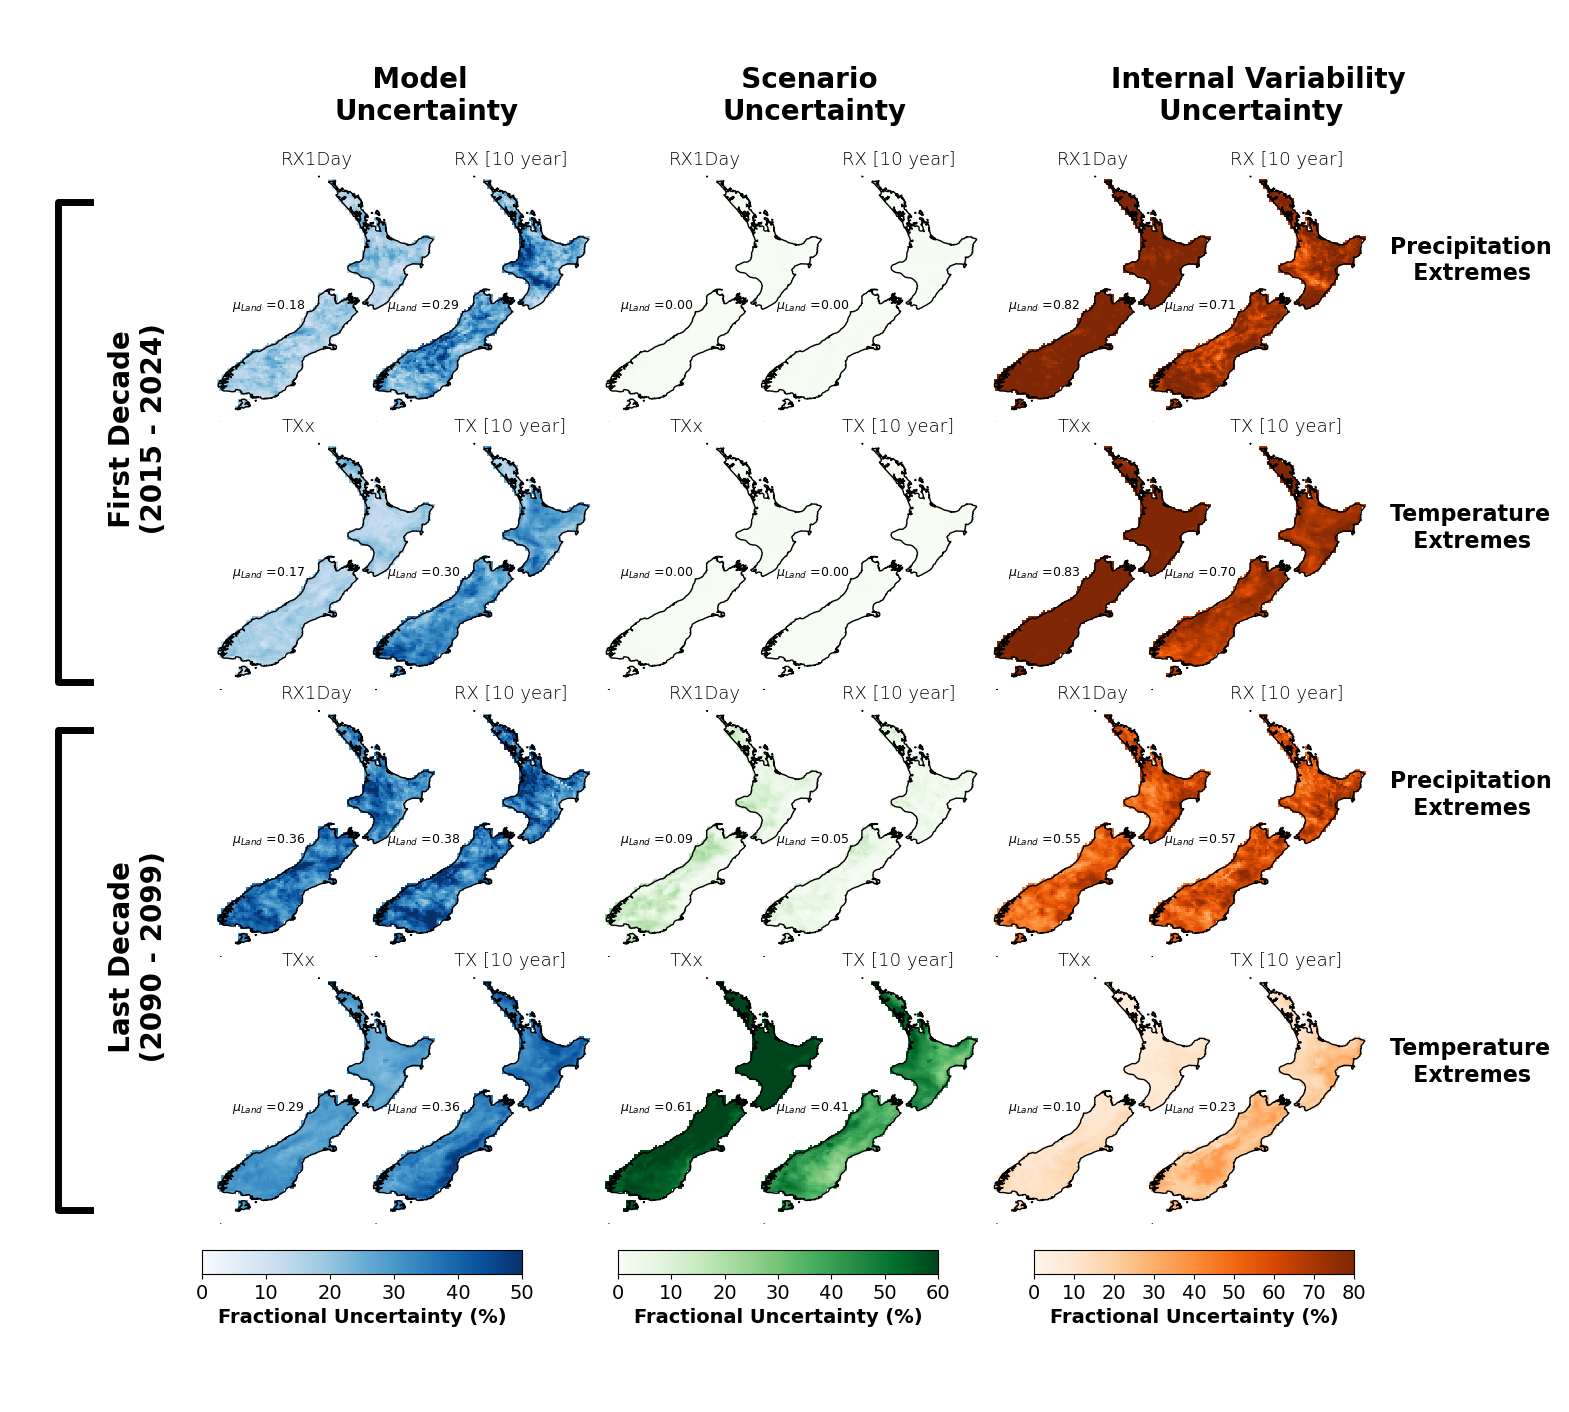

In [438]:


fig = plt.figure(figsize=(16, 16))
gs = gridspec.GridSpec(8, 16, hspace=-0.55, wspace=0.025)
ax1 = fig.add_subplot(gs[0:2,0:3], projection=ccrs.PlateCarree(central_longitude =171.77))
ax2 = fig.add_subplot(gs[0:2,2:5], projection=ccrs.PlateCarree(central_longitude =171.77))
ax3 = fig.add_subplot(gs[0:2,5:8], projection=ccrs.PlateCarree(central_longitude =171.77))
ax4 = fig.add_subplot(gs[0:2,7:10], projection=ccrs.PlateCarree(central_longitude =171.77))
ax5 = fig.add_subplot(gs[0:2,10:13], projection=ccrs.PlateCarree(central_longitude =171.77))
ax6 = fig.add_subplot(gs[0:2,12:15], projection=ccrs.PlateCarree(central_longitude =171.77))


ax11 = fig.add_subplot(gs[2:4,0:3], projection=ccrs.PlateCarree(central_longitude =171.77))
ax22 = fig.add_subplot(gs[2:4,2:5], projection=ccrs.PlateCarree(central_longitude =171.77))
ax33 = fig.add_subplot(gs[2:4,5:8], projection=ccrs.PlateCarree(central_longitude =171.77))
ax44 = fig.add_subplot(gs[2:4,7:10], projection=ccrs.PlateCarree(central_longitude =171.77))
ax55 = fig.add_subplot(gs[2:4,10:13], projection=ccrs.PlateCarree(central_longitude =171.77))
ax66 = fig.add_subplot(gs[2:4,12:15], projection=ccrs.PlateCarree(central_longitude =171.77))








ax111 = fig.add_subplot(gs[4:6,0:3], projection=ccrs.PlateCarree(central_longitude =171.77))
ax222 = fig.add_subplot(gs[4:6,2:5], projection=ccrs.PlateCarree(central_longitude =171.77))
ax333 = fig.add_subplot(gs[4:6,5:8], projection=ccrs.PlateCarree(central_longitude =171.77))
ax444 = fig.add_subplot(gs[4:6,7:10], projection=ccrs.PlateCarree(central_longitude =171.77))
ax555 = fig.add_subplot(gs[4:6,10:13], projection=ccrs.PlateCarree(central_longitude =171.77))
ax666 = fig.add_subplot(gs[4:6,12:15], projection=ccrs.PlateCarree(central_longitude =171.77))


ax1111 = fig.add_subplot(gs[6:8,0:3], projection=ccrs.PlateCarree(central_longitude =171.77))
ax2222 = fig.add_subplot(gs[6:8,2:5], projection=ccrs.PlateCarree(central_longitude =171.77))
ax3333 = fig.add_subplot(gs[6:8,5:8], projection=ccrs.PlateCarree(central_longitude =171.77))
ax4444 = fig.add_subplot(gs[6:8,7:10], projection=ccrs.PlateCarree(central_longitude =171.77))
ax5555 = fig.add_subplot(gs[6:8,10:13], projection=ccrs.PlateCarree(central_longitude =171.77))
ax6666 = fig.add_subplot(gs[6:8,12:15], projection=ccrs.PlateCarree(central_longitude =171.77))

v_max_s =0.6
v_max_I = 0.8
v_max_m = 0.5


axes = [ax11, ax22, ax33, ax44, ax55, ax66, ax1, ax2, ax3, ax4, 
        ax5, ax6, ax111, ax222, ax333, ax444, ax555, ax666, ax1111, ax2222, ax3333, ax4444, ax5555, ax6666]

def plot_with_mean(ax, data_array, cmap, vmin, vmax):
    im = data_array.plot(ax=ax, cmap=cmap, vmin=vmin, vmax=vmax,
                         transform=ccrs.PlateCarree(), add_colorbar=False)
    mean_val = data_array.mean().item()
    ax.text(167.25, -41, '$\mu_{Land}$' +f' ={mean_val:.2f}', transform=ccrs.PlateCarree(),
            fontsize=9, verticalalignment='top', color='black')
    return im

# === RX1DAY: 2090–2100 ===
plot_with_mean(ax111, merged_rx1day['Model'].sel(year=slice(2090, 2100)).mean("year").where(static_fields.orog > 0, np.nan),
               cmap='Blues', vmin=0, vmax=v_max_m)
plot_with_mean(ax333, merged_rx1day['Scenario'].sel(year=slice(2090, 2100)).mean("year").where(static_fields.orog > 0, np.nan),
               cmap='Greens', vmin=0, vmax=v_max_s)
plot_with_mean(ax555, merged_rx1day['Internal Variability'].sel(year=slice(2090, 2100)).mean("year").where(static_fields.orog > 0, np.nan),
               cmap='Oranges', vmin=0, vmax=v_max_I)

# === RX10: 2090–2100 ===
plot_with_mean(ax222, merged_rx10['Model'].sel(year=slice(2090, 2100)).mean("year").where(static_fields.orog > 0, np.nan),
               cmap='Blues', vmin=0, vmax=v_max_m)
plot_with_mean(ax444, merged_rx10['Scenario'].sel(year=slice(2090, 2100)).mean("year").where(static_fields.orog > 0, np.nan),
               cmap='Greens', vmin=0, vmax=v_max_s)
plot_with_mean(ax666, merged_rx10['Internal Variability'].sel(year=slice(2090, 2100)).mean("year").where(static_fields.orog > 0, np.nan),
               cmap='Oranges', vmin=0, vmax=v_max_I)

# === RX1DAY: 2015–2025 ===
cs1 = plot_with_mean(ax1, merged_rx1day['Model'].sel(year=slice(2015, 2025)).mean("year").where(static_fields.orog > 0, np.nan),
               cmap='Blues', vmin=0, vmax=v_max_m)
cs2 = plot_with_mean(ax3, merged_rx1day['Scenario'].sel(year=slice(2015, 2025)).mean("year").where(static_fields.orog > 0, np.nan),
               cmap='Greens', vmin=0, vmax=v_max_s)
cs3 = plot_with_mean(ax5, merged_rx1day['Internal Variability'].sel(year=slice(2015, 2025)).mean("year").where(static_fields.orog > 0, np.nan),
               cmap='Oranges', vmin=0, vmax=v_max_I)

# === RX10: 2015–2025 ===
plot_with_mean(ax2, merged_rx10['Model'].sel(year=slice(2015, 2025)).mean("year").where(static_fields.orog > 0, np.nan),
               cmap='Blues', vmin=0, vmax=v_max_m)
plot_with_mean(ax4, merged_rx10['Scenario'].sel(year=slice(2015, 2025)).mean("year").where(static_fields.orog > 0, np.nan),
               cmap='Greens', vmin=0, vmax=v_max_s)
plot_with_mean(ax6, merged_rx10['Internal Variability'].sel(year=slice(2015, 2025)).mean("year").where(static_fields.orog > 0, np.nan),
               cmap='Oranges', vmin=0, vmax=v_max_I)

# === TXx: 2090–2100 ===
plot_with_mean(ax1111, merged_txx['Model'].sel(year=slice(2090, 2100)).mean("year").where(static_fields.orog > 0, np.nan),
               cmap='Blues', vmin=0, vmax=v_max_m)
plot_with_mean(ax3333, merged_txx['Scenario'].sel(year=slice(2090, 2100)).mean("year").where(static_fields.orog > 0, np.nan),
               cmap='Greens', vmin=0, vmax=v_max_s)
plot_with_mean(ax5555, merged_txx['Internal Variability'].sel(year=slice(2090, 2100)).mean("year").where(static_fields.orog > 0, np.nan),
               cmap='Oranges', vmin=0, vmax=v_max_I)

# === TX10: 2090–2100 ===
plot_with_mean(ax2222, merged_tx10['Model'].sel(year=slice(2090, 2100)).mean("year").where(static_fields.orog > 0, np.nan),
               cmap='Blues', vmin=0, vmax=v_max_m)
plot_with_mean(ax4444, merged_tx10['Scenario'].sel(year=slice(2090, 2100)).mean("year").where(static_fields.orog > 0, np.nan),
               cmap='Greens', vmin=0, vmax=v_max_s)
plot_with_mean(ax6666, merged_tx10['Internal Variability'].sel(year=slice(2090, 2100)).mean("year").where(static_fields.orog > 0, np.nan),
               cmap='Oranges', vmin=0, vmax=v_max_I)

# === TXx: 2015–2025 ===
plot_with_mean(ax11, merged_txx['Model'].sel(year=slice(2015, 2025)).mean("year").where(static_fields.orog > 0, np.nan),
               cmap='Blues', vmin=0, vmax=v_max_m)
plot_with_mean(ax33, merged_txx['Scenario'].sel(year=slice(2015, 2025)).mean("year").where(static_fields.orog > 0, np.nan),
               cmap='Greens', vmin=0, vmax=v_max_s)
plot_with_mean(ax55, merged_txx['Internal Variability'].sel(year=slice(2015, 2025)).mean("year").where(static_fields.orog > 0, np.nan),
               cmap='Oranges', vmin=0, vmax=v_max_I)

# === TX10: 2015–2025 ===
plot_with_mean(ax22, merged_tx10['Model'].sel(year=slice(2015, 2025)).mean("year").where(static_fields.orog > 0, np.nan),
               cmap='Blues', vmin=0, vmax=v_max_m)
plot_with_mean(ax44, merged_tx10['Scenario'].sel(year=slice(2015, 2025)).mean("year").where(static_fields.orog > 0, np.nan),
               cmap='Greens', vmin=0, vmax=v_max_s)
plot_with_mean(ax66, merged_tx10['Internal Variability'].sel(year=slice(2015, 2025)).mean("year").where(static_fields.orog > 0, np.nan),
               cmap='Oranges', vmin=0, vmax=v_max_I)
#fig, ax = plt.subplots(2,3, figsize = (18, 10), subplot_kw = dict(projection =ccrs.PlateCarree(central_longitude =171.77)), sharex=True, sharey =True)
# cs1 = merged_rx1day['Model'].sel(year =slice(2090,2100)).mean("year").where(static_fields.orog>0, np.nan).plot(ax =ax111, cmap ='Blues', vmin =0, vmax =v_max_m, transform = ccrs.PlateCarree(), add_colorbar =False)
# cs2 = merged_rx1day['Scenario'].sel(year =slice(2090,2100)).mean("year").where(static_fields.orog>0, np.nan).plot(ax =ax333, cmap ='Greens', vmin =0, vmax =v_max_s, transform = ccrs.PlateCarree(), add_colorbar =False)
# cs3 = merged_rx1day['Internal Variability'].sel(year =slice(2090,2100)).mean("year").where(static_fields.orog>0, np.nan).plot(ax =ax555, cmap ='Oranges', vmin =0, vmax =v_max_I, transform = ccrs.PlateCarree(), add_colorbar =False)


# merged_rx10['Model'].sel(year =slice(2090,2100)).mean("year").where(static_fields.orog>0, np.nan).plot(ax =ax222, cmap ='Blues', vmin =0, vmax =v_max_m, transform = ccrs.PlateCarree(), add_colorbar =False)
# merged_rx10['Scenario'].sel(year =slice(2090,2100)).mean("year").where(static_fields.orog>0, np.nan).plot(ax =ax444, cmap ='Greens', vmin =0, vmax =v_max_s, transform = ccrs.PlateCarree(), add_colorbar =False)
# merged_rx10['Internal Variability'].sel(year =slice(2090,2100)).mean("year").where(static_fields.orog>0, np.nan).plot(ax =ax666, cmap ='Oranges', vmin =0, vmax =v_max_I, transform = ccrs.PlateCarree(), add_colorbar =False)


# merged_rx1day['Model'].sel(year =slice(2015,2025)).mean("year").where(static_fields.orog>0, np.nan).plot(ax =ax1, cmap ='Blues', vmin =0, vmax =v_max_m, transform = ccrs.PlateCarree(), add_colorbar =False)
# merged_rx1day['Scenario'].sel(year =slice(2015,2025)).mean("year").where(static_fields.orog>0, np.nan).plot(ax =ax3, cmap ='Greens', vmin =0, vmax =v_max_s, transform = ccrs.PlateCarree(), add_colorbar =False)
# merged_rx1day['Internal Variability'].sel(year =slice(2015,2025)).mean("year").where(static_fields.orog>0, np.nan).plot(ax =ax5, cmap ='Oranges', vmin =0, vmax =v_max_I, transform = ccrs.PlateCarree(), add_colorbar =False)


# merged_rx10['Model'].sel(year =slice(2015,2025)).mean("year").where(static_fields.orog>0, np.nan).plot(ax =ax2, cmap ='Blues', vmin =0, vmax =v_max_m, transform = ccrs.PlateCarree(), add_colorbar =False)
# merged_rx10['Scenario'].sel(year =slice(2015,2025)).mean("year").where(static_fields.orog>0, np.nan).plot(ax =ax4, cmap ='Greens', vmin =0, vmax =v_max_s, transform = ccrs.PlateCarree(), add_colorbar =False)
# merged_rx10['Internal Variability'].sel(year =slice(2015,2025)).mean("year").where(static_fields.orog>0, np.nan).plot(ax =ax6, cmap ='Oranges', vmin =0, vmax =v_max_I, transform = ccrs.PlateCarree(), add_colorbar =False)



# merged_txx['Model'].sel(year =slice(2090,2100)).mean("year").where(static_fields.orog>0, np.nan).plot(ax =ax1111, cmap ='Blues', vmin =0, vmax =v_max_m, transform = ccrs.PlateCarree(), add_colorbar =False)
# merged_txx['Scenario'].sel(year =slice(2090,2100)).mean("year").where(static_fields.orog>0, np.nan).plot(ax =ax3333, cmap ='Greens', vmin =0, vmax =v_max_s, transform = ccrs.PlateCarree(), add_colorbar =False)
# merged_txx['Internal Variability'].sel(year =slice(2090,2100)).mean("year").where(static_fields.orog>0, np.nan).plot(ax =ax5555, cmap ='Oranges', vmin =0, vmax =v_max_I, transform = ccrs.PlateCarree(), add_colorbar =False)


# merged_tx10['Model'].sel(year =slice(2090,2100)).mean("year").where(static_fields.orog>0, np.nan).plot(ax =ax2222, cmap ='Blues', vmin =0, vmax =v_max_m, transform = ccrs.PlateCarree(), add_colorbar =False)
# merged_tx10['Scenario'].sel(year =slice(2090,2100)).mean("year").where(static_fields.orog>0, np.nan).plot(ax =ax4444, cmap ='Greens', vmin =0, vmax =v_max_s, transform = ccrs.PlateCarree(), add_colorbar =False)
# merged_tx10['Internal Variability'].sel(year =slice(2090,2100)).mean("year").where(static_fields.orog>0, np.nan).plot(ax =ax6666, cmap ='Oranges', vmin =0, vmax =v_max_I, transform = ccrs.PlateCarree(), add_colorbar =False)


# merged_txx['Model'].sel(year =slice(2015,2025)).mean("year").where(static_fields.orog>0, np.nan).plot(ax =ax11, cmap ='Blues', vmin =0, vmax =v_max_m, transform = ccrs.PlateCarree(), add_colorbar =False)
# merged_txx['Scenario'].sel(year =slice(2015,2025)).mean("year").where(static_fields.orog>0, np.nan).plot(ax =ax33, cmap ='Greens', vmin =0, vmax =v_max_s, transform = ccrs.PlateCarree(), add_colorbar =False)
# merged_txx['Internal Variability'].sel(year =slice(2015,2025)).mean("year").where(static_fields.orog>0, np.nan).plot(ax =ax55, cmap ='Oranges', vmin =0, vmax =v_max_I, transform = ccrs.PlateCarree(), add_colorbar =False)


# merged_tx10['Model'].sel(year =slice(2015,2025)).mean("year").where(static_fields.orog>0, np.nan).plot(ax =ax22, cmap ='Blues', vmin =0, vmax =v_max_m, transform = ccrs.PlateCarree(), add_colorbar =False)
# merged_tx10['Scenario'].sel(year =slice(2015,2025)).mean("year").where(static_fields.orog>0, np.nan).plot(ax =ax44, cmap ='Greens', vmin =0, vmax =v_max_s, transform = ccrs.PlateCarree(), add_colorbar =False)
# merged_tx10['Internal Variability'].sel(year =slice(2015,2025)).mean("year").where(static_fields.orog>0, np.nan).plot(ax =ax66, cmap ='Oranges', vmin =0, vmax =v_max_I, transform = ccrs.PlateCarree(), add_colorbar =False)
# ax[0,0].set_title('Model Uncertainty', weight ='bold', fontsize =15)
# ax[0,1].set_title('Scenario Uncertainty', weight ='bold', fontsize =15)
# ax[0,2].set_title('Internal Variability Uncertainty', weight ='bold', fontsize =15)
# ax[1,0].set_title(' ')
# ax[1,1].set_title(' ')
# ax[1,2].set_title(' ')
# ax[0,0].coastlines('10m')
# ax[0,1].coastlines('10m')
# ax[0,2].coastlines('10m')
# ax[1,0].coastlines('10m')
# ax[1,1].coastlines('10m')
# ax[1,2].coastlines('10m')
[axi.set_extent([166, 179, -48, -33], crs = ccrs.PlateCarree()) for axi in axes]
[axi.set_title(' ') for axi in axes]
[axi.coastlines('10m') for axi in axes]
[axi.set_frame_on(False) for axi in axes]
ax1.text(173, -31, '    Model \nUncertainty', fontsize =20, weight='bold', transform = ccrs.PlateCarree())
ax3.text(173, -31, '  Scenario \nUncertainty', fontsize =20, weight='bold', transform = ccrs.PlateCarree())
ax5.text(173, -31, 'Internal Variability\n     Uncertainty', fontsize =20, weight='bold', transform = ccrs.PlateCarree())
ax14 = fig.add_axes([0.12, 0.13, 0.2, 0.015])
cbar = fig.colorbar(cs1, cax = ax14, orientation ='horizontal')
cbar.set_label('Fractional Uncertainty (%)', fontsize =14, weight ='bold')
ax15 = fig.add_axes([0.38, 0.13, 0.2, 0.015])
cbar2 = fig.colorbar(cs2, cax = ax15, orientation ='horizontal')
cbar2.set_label('Fractional Uncertainty (%)', fontsize =14, weight ='bold')

ax16 = fig.add_axes([0.64, 0.13, 0.2, 0.015])
cbar3 = fig.colorbar(cs3, cax = ax16, orientation ='horizontal')
cbar3.set_label('Fractional Uncertainty (%)', fontsize =14,  weight ='bold')
cbar.set_ticks(np.arange(0, v_max_m+0.1, 0.1))
cbar.set_ticklabels(["%.0f" % f for f in np.arange(0, v_max_m+0.1, 0.1)*100])
cbar2.set_ticks(np.arange(0, v_max_s+0.1, 0.1))
cbar2.set_ticklabels(["%.0f" % f for f in np.arange(0, v_max_s+0.1, 0.1)*100])

cbar3.set_ticks(np.arange(0, v_max_I+0.1, 0.1))
cbar3.set_ticklabels(["%.0f" % f for f in np.arange(0, v_max_I+0.1, 0.1)*100])
cbar3.ax.tick_params(labelsize =14)
cbar2.ax.tick_params(labelsize =14)
cbar.ax.tick_params(labelsize =14)

# Add text label ("JJA") on the left
fig.text(0.08, 0.48 + (0.85 - 0.5)/2, '  First Decade \n (2015 - 2024)', fontsize=20, va='center', ha='center', weight ='bold', rotation =90)

# Add thick bracket-like symbol
bracket_x = [0.05, 0.03, 0.03, 0.05]  # X-coordinates
bracket_y = [0.8, 0.8, 0.5, 0.5]  # Y-coordinates
ax51 = fig.add_axes([0, 0.52, 0.05, 0.4])#

ax51.plot(bracket_x, bracket_y, transform=fig.transFigure, lw=5, color='black', clip_on=False)
ax51.set_frame_on(False)
ax51.set_xticks([])
ax51.set_yticks([])
fig.text(0.08, 0.15 + (0.4 - 0.05)/2, '  Last Decade \n (2090 - 2099)', fontsize=20, va='center', ha='center', weight ='bold', rotation =90)
#fig.text(-0.078, -0.05 +  (0.4 - 0.05)/2, "Forced\n$RMS_{GCM-GAN}$=" + f'{"%.1f" % np.sqrt(abs(cc_signal.where(static_fields.orog>0, np.nan).mean("GCM_variant") - cc_signal_em.where(static_fields.orog>0, np.nan).mean("GCM_variant"))**2).mean()}', fontsize=15, va='center', ha='center', rotation =0)
# Add thick bracket-like symbol
bracket_x = [0.05, 0.03, 0.03, 0.05]  # X-coordinates
bracket_y = [0.47, 0.47, 0.17, 0.17]  # Y-coordinates
ax61 = fig.add_axes([0, 0.05, 0.05, 0.4])

ax61.plot(bracket_x, bracket_y, transform=fig.transFigure, lw=5, color='black', clip_on=False)
ax61.set_frame_on(False)
ax61.set_xticks([])
ax61.set_yticks([])
#ax1.text(160, -41, '  First Decade \n (2015 - 2024)', fontsize =16,  transform = ccrs.PlateCarree())
#ax11.text(160, -41, '  Last Decade \n (2090 - 2099)', fontsize =16, transform = ccrs.PlateCarree())
ax1.text(170, -33.5, 'RX1Day', fontsize =13, transform = ccrs.PlateCarree(), weight ='light',)
ax2.text(171, -33.5, 'RX [10 year]', fontsize =13, transform = ccrs.PlateCarree(), weight ='light',)

ax3.text(170, -33.5, 'RX1Day', fontsize =13, transform = ccrs.PlateCarree(), weight ='light',)
ax4.text(171, -33.5, 'RX [10 year]', fontsize =13, transform = ccrs.PlateCarree(), weight ='light',)
ax5.text(170, -33.5, 'RX1Day', fontsize =13, transform = ccrs.PlateCarree(), weight ='light',)
ax6.text(171, -33.5, 'RX [10 year]', fontsize =13, transform = ccrs.PlateCarree(), weight ='light',)


ax111.text(170, -33.5, 'RX1Day', fontsize =13, transform = ccrs.PlateCarree(), weight ='light',)
ax222.text(171, -33.5, 'RX [10 year]', fontsize =13, transform = ccrs.PlateCarree(), weight ='light',)

ax333.text(170, -33.5, 'RX1Day', fontsize =13, transform = ccrs.PlateCarree(), weight ='light',)
ax444.text(171, -33.5, 'RX [10 year]', fontsize =13, transform = ccrs.PlateCarree(), weight ='light',)
ax555.text(170, -33.5, 'RX1Day', fontsize =13, transform = ccrs.PlateCarree(), weight ='light',)
ax666.text(171, -33.5, 'RX [10 year]', fontsize =13, transform = ccrs.PlateCarree(), weight ='light',)


ax11.text(170, -33.5, 'TXx', fontsize =13, transform = ccrs.PlateCarree(), weight ='light',)
ax22.text(171, -33.5, 'TX [10 year]', fontsize =13, transform = ccrs.PlateCarree(), weight ='light',)

ax33.text(170, -33.5, 'TXx', fontsize =13, transform = ccrs.PlateCarree(), weight ='light',)
ax44.text(171, -33.5, 'TX [10 year]', fontsize =13, transform = ccrs.PlateCarree(), weight ='light',)
ax55.text(170, -33.5, 'TXx', fontsize =13, transform = ccrs.PlateCarree(), weight ='light',)
ax66.text(171, -33.5, 'TX [10 year]', fontsize =13, transform = ccrs.PlateCarree(), weight ='light',)

ax1111.text(170, -33.5, 'TXx', fontsize =13, transform = ccrs.PlateCarree(), weight ='light',)
ax2222.text(171, -33.5, 'TX [10 year]', fontsize =13, transform = ccrs.PlateCarree(), weight ='light',)

ax3333.text(170, -33.5, 'TXx', fontsize =13, transform = ccrs.PlateCarree(), weight ='light',)
ax4444.text(171, -33.5, 'TX [10 year]', fontsize =13, transform = ccrs.PlateCarree(), weight ='light',)
ax5555.text(170, -33.5, 'TXx', fontsize =13, transform = ccrs.PlateCarree(), weight ='light',)
ax6666.text(171, -33.5, 'TX [10 year]', fontsize =13, transform = ccrs.PlateCarree(), weight ='light',)
ax6.text(180, -40, 'Precipitation \n   Extremes' , fontsize =16, transform = ccrs.PlateCarree(), weight ='bold')
ax666.text(180, -40, 'Precipitation \n   Extremes' , fontsize =16, transform = ccrs.PlateCarree(), weight ='bold')
ax6666.text(180, -40, 'Temperature \n   Extremes' , fontsize =16, transform = ccrs.PlateCarree(), weight ='bold')
ax66.text(180, -40, 'Temperature \n   Extremes' , fontsize =16, transform = ccrs.PlateCarree(), weight ='bold')
#fig.savefig('/nesi/project/niwa00018/ML_downscaling_CCAM/AI_large_ensemble/figures/internal_variability_uncertainty_spatial_rx1day_txx_static_I_v040525.png', dpi =500, bbox_inches ='tight')
#fig.savefig('/nesi/project/niwa00018/ML_downscaling_CCAM/AI_large_ensemble/figures/internal_variability_uncertainty_spatial_rx1day_txx_static_I_v040525.pdf', dpi =300, bbox_inches ='tight')
# ax[0,0].text(165, -43, '2015 - 2025', weight ='bold', transform = ccrs.PlateCarree(), fontsize = 18, rotation =90)
# ax[1,0].text(165, -43, '2090 - 2100', weight ='bold', transform = ccrs.PlateCarree(), fontsize = 18, rotation =90)
# [ax[i,j].set_frame_on(False) for i in range(2) for j in range(3)]
#fig.savefig(r'/nesi/project/niwa00018/ML_downscaling_CCAM/AI_large_ensemble/figures/Hawkins_Sutton/Figure_4_Spatial_Hawkins_andSutton.png', dpi =500, bbox_inches ='tight')
#fig.savefig(r'/nesi/project/niwa00018/ML_downscaling_CCAM/AI_large_ensemble/figures/Hawkins_Sutton/Figure_4_Spatial_Hawkins_andSutton.pdf', dpi =300, bbox_inches ='tight')

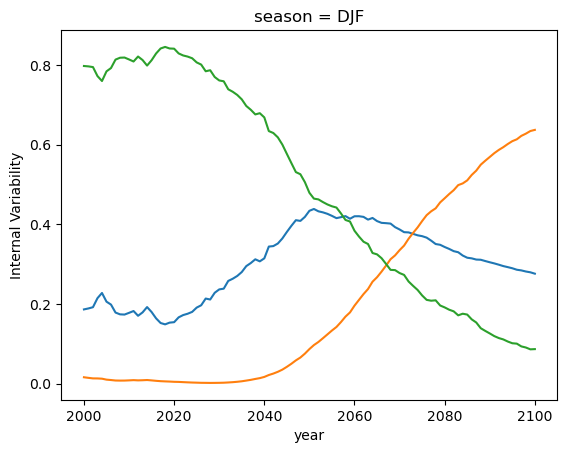

In [446]:
merged_txx['Model'].where(static_fields.orog>0, np.nan).mean(["lat","lon"]).plot()
merged_txx['Scenario'].where(static_fields.orog>0, np.nan).mean(["lat","lon"]).plot()
merged_txx['Internal Variability'].where(static_fields.orog>0, np.nan).mean(["lat","lon"]).plot()

In [461]:
merged_rx10

<xarray.Dataset>
Dimensions:               (year: 101, lat: 172, lon: 179)
Coordinates:
  * year                  (year) int64 2000 2001 2002 2003 ... 2098 2099 2100
  * lat                   (lat) float64 -51.21 -51.11 -51.0 ... -32.97 -32.86
  * lon                   (lon) float64 164.9 165.0 165.1 ... 183.7 183.9 184.0
    season                <U3 'DJF'
Data variables:
    Scenario              (year, lat, lon) float64 nan nan nan ... 0.1224 0.1194
    Internal Variability  (year, lat, lon) float64 nan nan nan ... 0.4553 0.4731
    Model                 (year, lat, lon) float64 nan nan nan ... 0.4224 0.4075
    Total                 (year, lat, lon) float64 nan nan ... 1.595e+04
    Static I              (year, lat, lon) float64 nan nan ... 7.548e+03

In [499]:
((merged_txx['Internal Variability'] * merged_txx['Total'])).where(static_fields.orog>0, np.nan).mean(["lat","lon"])

<xarray.DataArray (year: 101)>
array([0.20239847, 0.16876935, 0.14528033, 0.11015372, 0.09094402,
       0.09239763, 0.08725031, 0.09202368, 0.08907239, 0.08669898,
       0.08457877, 0.08460298, 0.09335408, 0.09287816, 0.09094402,
       0.10859197, 0.13242945, 0.16070318, 0.18293811, 0.19455733,
       0.21030396, 0.2103448 , 0.22548332, 0.24090771, 0.25427957,
       0.25580655, 0.27762125, 0.26542229, 0.2875365 , 0.27718905,
       0.28591914, 0.30526479, 0.28775476, 0.30377125, 0.31108154,
       0.30926196, 0.30287565, 0.29889337, 0.29456741, 0.31275113,
       0.31161268, 0.28198012, 0.29135204, 0.29079798, 0.28369709,
       0.26832547, 0.25831872, 0.24732774, 0.25610481, 0.25021543,
       0.23710357, 0.23322921, 0.23981933, 0.24695982, 0.2532896 ,
       0.25919323, 0.26668625, 0.26208099, 0.2573644 , 0.26713874,
       0.25551707, 0.2524639 , 0.25324635, 0.26086524, 0.24885954,
       0.25908482, 0.25989938, 0.2529699 , 0.24626469, 0.25732038,
       0.26122983, 0.26867185, 0.2591064 , 0.25827848, 0.25515719,
       0.24726901, 0.24389812, 0.2533107 , 0.26914017, 0.2604551 ,
       0.265016  , 0.26928393, 0.27520909, 0.26831627, 0.28942405,
       0.30046966, 0.2880792 , 0.28509064, 0.26516337, 0.26182728,
       0.26026271, 0.25682217, 0.25583018, 0.25854172, 0.25563486,
       0.25447656, 0.26434546, 0.2543455 , 0.25778257, 0.25520986,
       0.26805315])
Coordinates:
  * year     (year) int64 2000 2001 2002 2003 2004 ... 2096 2097 2098 2099 2100
    season   <U3 'DJF'

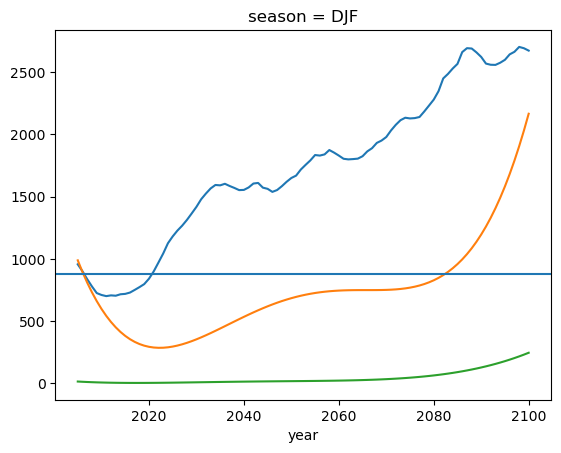

In [472]:
((merged_rx10['Internal Variability'] * merged_rx10['Total'])).where(static_fields.orog>0, np.nan).mean(["lat","lon"]).plot()
((merged_rx10['Model'] * merged_rx10['Total'])).where(static_fields.orog>0, np.nan).mean(["lat","lon"]).plot()
((merged_rx10['Scenario'] * merged_rx10['Total'])).where(static_fields.orog>0, np.nan).mean(["lat","lon"]).plot()
plt.axhline(((merged_rx10['Static I'])).where(static_fields.orog>0, np.nan).mean(["lat","lon"]))
#merged_rx10['Scenario'].where(static_fields.orog>0, np.nan).mean(["lat","lon"]).plot()
#merged_rx10['Internal Variability'].where(static_fields.orog>0, np.nan).mean(["lat","lon"]).plot(color ='r')

In [23]:
merged_txx['Internal Variability']

<xarray.DataArray 'Internal Variability' (year: 101, lat: 172, lon: 179)>
array([[[0.74867468, 0.74379275, 0.72965748, ..., 0.79005396,
         0.78062387, 0.77667059],
        [0.76095405, 0.74892564, 0.73395186, ..., 0.78793945,
         0.77826805, 0.76823669],
        [0.77034026, 0.761266  , 0.75351689, ..., 0.7769296 ,
         0.77000514, 0.76115203],
        ...,
        [0.83775485, 0.84320601, 0.83972835, ..., 0.80620302,
         0.81414978, 0.81710751],
        [0.83730508, 0.84518399, 0.84756884, ..., 0.80809119,
         0.81562151, 0.81877646],
        [0.82473862, 0.83311995, 0.8379467 , ..., 0.81374022,
         0.81931827, 0.82162467]],

       [[0.75437703, 0.75254199, 0.74586365, ..., 0.78283607,
         0.7755086 , 0.77231028],
        [0.77289437, 0.76867483, 0.7625731 , ..., 0.77602042,
         0.76758999, 0.75911751],
        [0.79160423, 0.79077059, 0.78643362, ..., 0.76318139,
         0.75709144, 0.74828564],
...
        [0.03851197, 0.03673506, 0.03441901, ..., 0.03744949,
         0.03689252, 0.03728913],
        [0.03858568, 0.03724735, 0.03583795, ..., 0.03718369,
         0.03636181, 0.03692012],
        [0.03859698, 0.03751319, 0.03681249, ..., 0.03716506,
         0.03668495, 0.03747723]],

       [[0.09518078, 0.09464188, 0.0911611 , ..., 0.10539074,
         0.10830103, 0.10810873],
        [0.09814835, 0.09640072, 0.09218872, ..., 0.111245  ,
         0.1121808 , 0.11302412],
        [0.10089893, 0.09746068, 0.09290357, ..., 0.11185685,
         0.11272796, 0.1128777 ],
        ...,
        [0.03123231, 0.03022809, 0.02796556, ..., 0.03449048,
         0.03504595, 0.03549023],
        [0.03193026, 0.03102406, 0.02904322, ..., 0.03489965,
         0.03489041, 0.03545724],
        [0.0331284 , 0.03219997, 0.03058065, ..., 0.03501961,
         0.03499202, 0.03582453]]])
Coordinates:
  * year     (year) int64 2000 2001 2002 2003 2004 ... 2096 2097 2098 2099 2100
  * lat      (lat) float64 -51.21 -51.11 -51.0 -50.89 ... -33.07 -32.97 -32.86
  * lon      (lon) float64 164.9 165.0 165.1 165.2 ... 183.6 183.7 183.9 184.0
    season   <U3 'DJF'

rolling av
rolling av
rolling av
Bbox(x0=0.125, y0=0.49465716829919854, x1=0.5745, y1=0.88)
rolling av
rolling av
rolling av
rolling av
rolling av
rolling av
rolling av
rolling av
rolling av


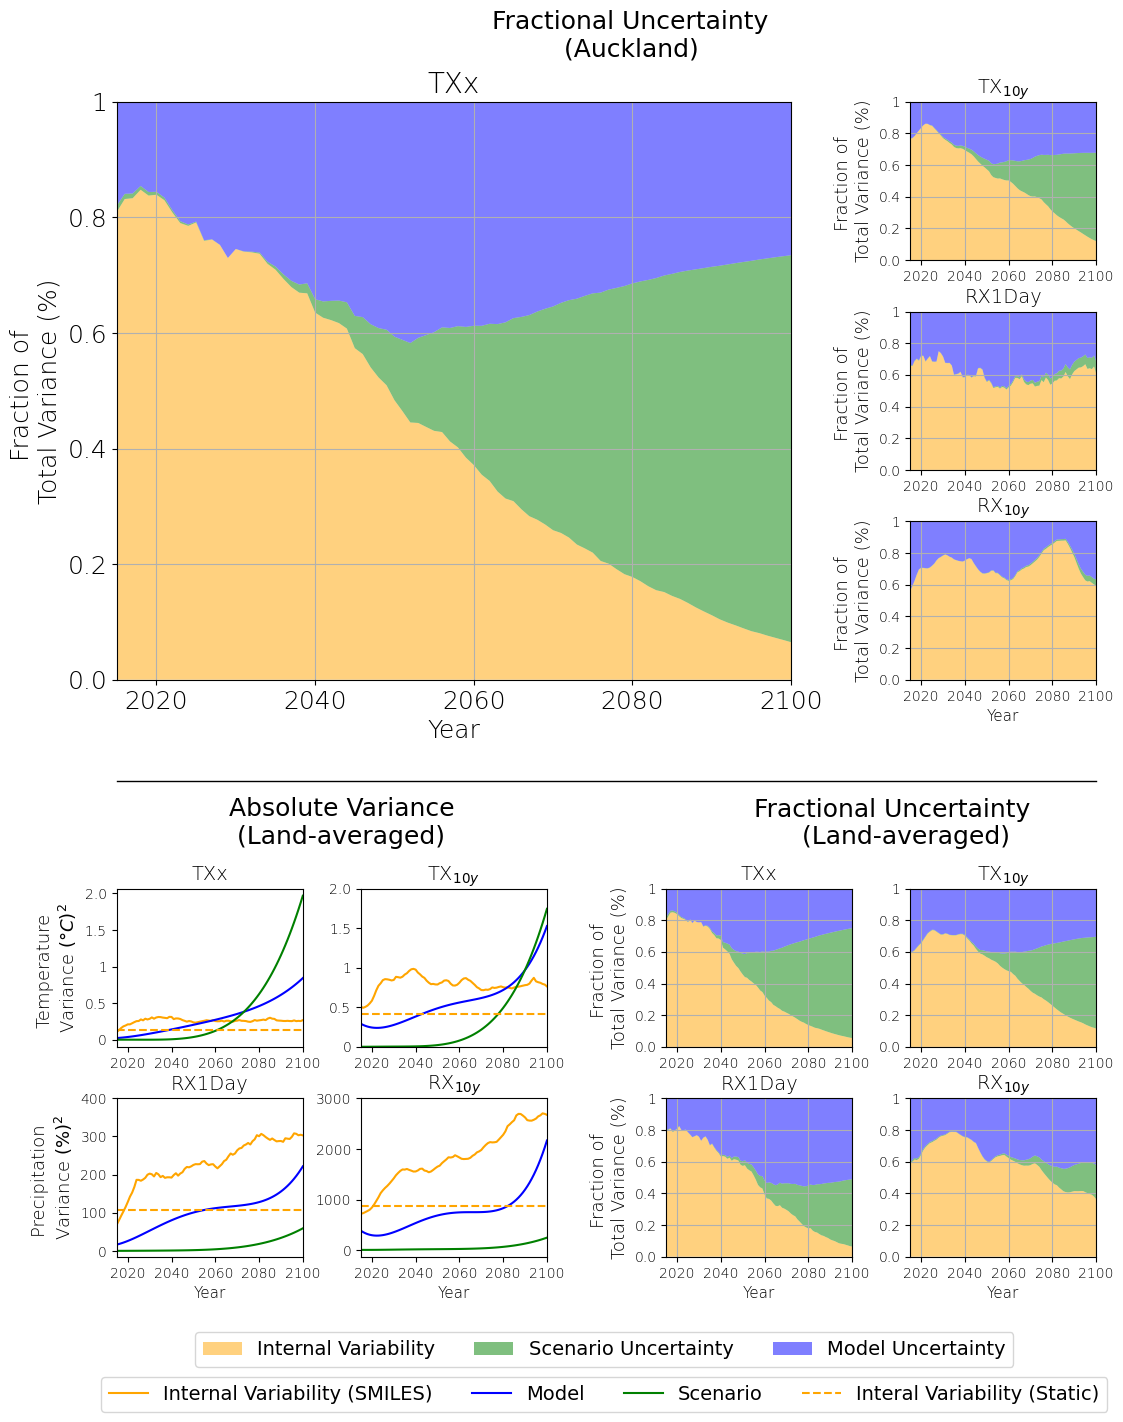

In [24]:
# Set up figure and grid

def plot_fractional_uncertainty(M, S, I, lat, lon, ax = None, region = None):
    if lat is not None:
        M_ = M.interp(lat = lat, lon = lon, method ='nearest')
        S_ = S.interp(lat = lat, lon =lon, method ='nearest')
        
        try:
            print("rolling av")
            I_ = I.interp(lat = lat, lon =lon, method ='nearest').rolling(year =20, min_periods =1).mean()
            #D_ = D.interp(lat = lat, lon =lon, method ='nearest').rolling(year =10, min_periods =1).mean()
        except:
            print("rolling av")
            I_ = I.interp(lat = lat, lon =lon, method ='nearest').rolling(time =20, min_periods =1).mean()
            #D_ = D.interp(lat = lat, lon =lon, method ='nearest').rolling(time =10, min_periods =1).mean()
    else:
        M_ = M
        S_ = S
        #D_ = D
        try:
            print("rolling av")
            I_ = I.rolling(time =20, min_periods =1).mean()
            #D_ = D.rolling(time =10, min_periods =1).mean()
        except:
            print("rolling av")
            I_ = I.rolling(year =20, min_periods =1).mean()
            #D_ = D.rolling(year =10, min_periods =1).mean()
    T = M_ + S_ + I_# + D_
    M_ = M_/T
    S_ = S_/T
    I_ = I_/T
    #D_ = D_/T
    try:
        ax.stackplot(
        I_.year,
        I_,
        S_,
        M_,
        labels=["Internal Variability", "Scenario Uncertainty","Model Uncertainty"],
            colors=["orange", "green", "blue"] , alpha =0.5)
    except:
        ax.stackplot(
        I_.time,
        I_,
        S_,
        M_,
        labels=["Internal Variability", "Scenario Uncertainty","Model Uncertainty"],
            colors=["orange", "green", "blue"] , alpha =0.5)
    #ax_t.set_xlabel("Lead Time [years from 2015]", fontsize=12, fontweight='bold')
    #ax.set_ylabel("Fraction of \nTotal Variance [%]", fontsize=14, fontweight='bold')
    ax.grid('on')
    ax.set_xlim(2015, 2099)
    ax.set_ylim(0,1)
    ax.set_xticks([2020, 2040, 2060, 2080, 2100])
    ax.set_xticklabels([2020, 2040, 2060, 2080, 2100], rotation =0, weight ='light')
    ax.set_yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1])
    ax.set_yticklabels([0.0, 0.2, 0.4, 0.6, 0.8, 1], rotation =0, weight ='light')
    handles, labels = ax.get_legend_handles_labels()
    return handles, labels    
    #return handles, labels
    

    #ax.set_frame_on(False)
    #ax.text(2035, 1.1, region, fontsize =14, weight ='bold')

fig = plt.figure(figsize=(15 , 15))
gs = GridSpec(23, 20, wspace=20, hspace=50)

ax1 = fig.add_subplot(gs[0:12, 0:12])

ax1.tick_params(labelsize =18)
ax1.set_ylabel("Fraction of \nTotal Variance (%)", fontsize=18, weight ='light')
ax11 = fig.add_subplot(gs[0:4, 13:17])
plot_fractional_uncertainty(merged_txx['Model'], merged_txx['Scenario'], merged_txx['Internal Variability'],
                                 -36.7928, 174.6131, ax = ax1, region = 'Auckland')   

plot_fractional_uncertainty(merged_tx10['Model'], merged_tx10['Scenario'], merged_tx10['Internal Variability'],
                                 -36.7928, 174.6131, ax = ax11, region = 'Auckland')  
ax11.tick_params(labelsize =10)
ax1.set_title('TXx', fontsize =20, weight ='light')
ax11.set_ylabel("Fraction of \nTotal Variance (%)", fontsize=13, weight ='light')
ax111 = fig.add_subplot(gs[4:8, 13:17])
ax1111 = fig.add_subplot(gs[8:12 ,13:17])
plot_fractional_uncertainty(merged_rx1day['Model'], merged_rx1day['Scenario'], merged_rx1day['Internal Variability'],
                                 -36.7928, 174.6131, ax = ax111, region = 'Auckland')  
ax11.set_title('TX$_{10y}$', fontsize =14, weight ='light')


from matplotlib.lines import Line2D
bbox = ax1.get_position()
bbox1 = ax1111.get_position()
print(bbox)  # This gives (x0, y0, x1, y1)

# Then place the line slightly below y0
y_line = bbox.y0 - 0.0675  # Slightly below ax1

# Draw the line
fig.add_artist(Line2D(
    [bbox.x0, bbox1.x1],
    [y_line, y_line],
    color='black',
    linewidth=1
))



max_height = 15
ax111.set_title('RX1Day', fontsize =14, weight ='light')
ax111.tick_params(labelsize =10)
ax111.set_ylabel("Fraction of \nTotal Variance (%)", fontsize=13, weight ='light')

ax1111.tick_params(labelsize =10)
ax1111.set_title('RX$_{10y}$', fontsize= 14, weight ='light')
ax1111.set_ylabel("Fraction of \nTotal Variance (%)", fontsize=13, weight ='light')
plot_fractional_uncertainty(merged_rx10['Model'], merged_rx10['Scenario'], merged_rx10['Internal Variability'],
                                 -43.532, 172.6366, ax = ax1111, region = 'Auckland')  
ax2 = fig.add_subplot(gs[max_height:max_height+4, 0:4])
ax22 = fig.add_subplot(gs[max_height:max_height+4, 4:8])
#plot_fractional_uncertainty(merged_tx10['Model'], merged_tx10['Scenario'], merged_tx10['Internal Variability'],
#                                 -43.532, 172.6366, ax = ax22, region = 'Auckland')  

#plot_fractional_uncertainty(merged_txx['Model'], merged_txx['Scenario'], merged_txx['Internal Variability'],
#                                 -43.532, 172.6366, ax = ax2, region = 'Auckland')  
ax222 = fig.add_subplot(gs[max_height+4:max_height+8, 0:4])
#plot_fractional_uncertainty(merged_rx1day['Model'], merged_rx1day['Scenario'], merged_txx['Internal Variability'],
#                                 -43.532, 172.6366, ax = ax222, region = 'Auckland')  
ax2222 = fig.add_subplot(gs[max_height+4:max_height+8, 4:8])
# plot_fractional_uncertainty(merged_rx10['Model'], merged_rx10['Scenario'], merged_rx10['Internal Variability'],
#                                  -43.532, 172.6366, ax = ax2222, region = 'Auckland')  
# fURTHER SMOOTHING OF RX1Day is required!!!!
# TODO add regional averages here. 
#-43.532, 172.6366

ax3 = fig.add_subplot(gs[max_height:max_height+4, 9:13])
ax33 = fig.add_subplot(gs[max_height:max_height+4, 13:17])
ax333 = fig.add_subplot(gs[max_height+4:max_height+8, 9:13])
ax3333 = fig.add_subplot(gs[max_height+4:max_height+8, 13:17])


plot_fractional_uncertainty(merged_rx10_av['Model'], merged_rx10_av['Scenario'], merged_rx10_av['Internal Variability'],
                                 None, None, ax = ax3333, region = 'Auckland')  

plot_fractional_uncertainty(merged_tx10_av['Model'], merged_tx10_av['Scenario'], merged_tx10_av['Internal Variability'],
                                 None, None, ax = ax33, region = 'Auckland')  

plot_fractional_uncertainty(merged_txx_av['Model'], merged_txx_av['Scenario'], merged_txx_av['Internal Variability'],
                                 None, None, ax = ax3, region = 'Auckland')  

handles, labels = plot_fractional_uncertainty(merged_rx1day_av['Model'], merged_rx1day_av['Scenario'], merged_txx_av['Internal Variability'],
                                 None, None, ax = ax333, region = 'Auckland')  
ax3.set_title('TXx', fontsize =14, weight ='light')
ax3333.set_title('RX$_{10y}$', fontsize =14, weight ='light')
ax33.set_title('TX$_{10y}$', fontsize =14, weight ='light')
ax333.set_title('RX1Day', fontsize =14, weight ='light')
ax1.set_xlabel('Year', fontsize =18, weight ='light')
ax1111.set_xlabel('Year', fontsize =11, weight ='light')
ax2.set_title('TXx', fontsize =14, weight ='light')
ax2222.set_title('RX$_{10y}$', fontsize =14, weight ='light')
ax22.set_title('TX$_{10y}$', fontsize =14, weight ='light')
ax222.set_title('RX1Day', fontsize =14, weight ='light')
ax2.set_ylabel("Fraction of \nTotal Variance (%)", fontsize=13, weight ='light')
ax222.set_ylabel("Fraction of \nTotal Variance (%)", fontsize=13, weight ='light')
ax3.set_ylabel("Fraction of \nTotal Variance (%)", fontsize=13, weight ='light')
ax333.set_ylabel("Fraction of \nTotal Variance (%)", fontsize=13, weight ='light')
fig.text(0.2, 0.385, 'Absolute Variance \n (Land-averaged)', fontsize =18)
fig.text(0.55, 0.385, 'Fractional Uncertainty \n      (Land-averaged)', fontsize =18)
fig.text(0.37, 0.91, ' Fractional Uncertainty  \n          (Auckland)', fontsize =18)

ax222.set_xlabel('Year', fontsize =11, weight ='light')
ax2222.set_xlabel('Year', fontsize =11, weight ='light')

ax333.set_xlabel('Year', fontsize =11, weight ='light')
ax3333.set_xlabel('Year', fontsize =11, weight ='light')



#ax4 = fig.add_subplot(gs[23:27, 0:4])
#ax44 = fig.add_subplot(gs[23:27, 4:8])
#ax444 = fig.add_subplot(gs[23:27, 9:13])
#ax4444 = fig.add_subplot(gs[23:27, 13:17])

((merged_txx['Internal Variability'] * merged_txx['Total'])).where(static_fields.orog>0, np.nan).mean(["lat","lon"]).plot(ax = ax2, color ='Orange', label ='Internal Variability (SMILES)')
((merged_txx['Model'] * merged_txx['Total'])).where(static_fields.orog>0, np.nan).mean(["lat","lon"]).plot(ax = ax2, color ='Blue', label ='Model' )
((merged_txx['Scenario'] * merged_txx['Total'])).where(static_fields.orog>0, np.nan).mean(["lat","lon"]).plot(ax = ax2, color ='Green', label ='Scenario')
ax2.axhline(((merged_txx['Static I'])).where(static_fields.orog>0, np.nan).mean(["lat","lon"]), color ='Orange', ls ='--', label ='Interal Variability (Static)')


((merged_tx10['Internal Variability'] * merged_tx10['Total'])).where(static_fields.orog>0, np.nan).mean(["lat","lon"]).plot(ax = ax22, color ='Orange')
((merged_tx10['Model'] * merged_tx10['Total'])).where(static_fields.orog>0, np.nan).mean(["lat","lon"]).plot(ax = ax22, color ='Blue')
((merged_tx10['Scenario'] * merged_tx10['Total'])).where(static_fields.orog>0, np.nan).mean(["lat","lon"]).plot(ax = ax22, color ='Green')
ax22.axhline(((merged_tx10['Static I'])).where(static_fields.orog>0, np.nan).mean(["lat","lon"]), color ='Orange', ls ='--')
ax22.set_ylim(0, 2)
ax22.set_ylim(0, 2)








((merged_rx1day['Internal Variability'] * merged_rx1day['Total'])).where(static_fields.orog>0, np.nan).mean(["lat","lon"]).plot(ax = ax222, color ='Orange')
((merged_rx1day['Model'] * merged_rx1day['Total'])).where(static_fields.orog>0, np.nan).mean(["lat","lon"]).plot(ax = ax222, color ='Blue')
((merged_rx1day['Scenario'] * merged_rx1day['Total'])).where(static_fields.orog>0, np.nan).mean(["lat","lon"]).plot(ax = ax222, color ='Green')
ax222.axhline(((merged_rx1day['Static I'])).where(static_fields.orog>0, np.nan).mean(["lat","lon"]), color ='Orange', ls ='--')


((merged_rx10['Internal Variability'] * merged_rx10['Total'])).where(static_fields.orog>0, np.nan).mean(["lat","lon"]).plot(ax = ax2222, color ='Orange')
((merged_rx10['Model'] * merged_rx10['Total'])).where(static_fields.orog>0, np.nan).mean(["lat","lon"]).plot(ax = ax2222, color ='Blue')
((merged_rx10['Scenario'] * merged_rx10['Total'])).where(static_fields.orog>0, np.nan).mean(["lat","lon"]).plot(ax = ax2222, color ='Green')
ax2222.axhline(((merged_rx10['Static I'])).where(static_fields.orog>0, np.nan).mean(["lat","lon"]), color ='Orange', ls ='--')
#ax4444.set_ylim(0, 2)
#ax444.set_ylim(0, 2)

ax2.set_title('TXx', fontsize= 14, weight ='light')
ax22.set_title('TX$_{10y}$', fontsize= 14, weight ='light')
ax222.set_title('RX1Day', fontsize= 14, weight ='light')
ax2222.set_title('RX$_{10y}$', fontsize= 14, weight ='light')


ax222.set_xlabel('Year', fontsize =11, weight ='light')
ax2222.set_xlabel('Year', fontsize =11, weight ='light')

ax22.set_xlabel(' ', fontsize =11, weight ='light')
ax2.set_xlabel(' ', fontsize =11, weight ='light')

#merged_rx10['Scenario'].where(static_fields.orog>0, np.nan).mean(["lat","lon"]).plot()
#merged_rx10['Internal Variability'].where(static_fields.orog>0, np.nan).mean(["lat","lon"]).plot(color ='r')
ax2.set_xticks([2020, 2040, 2060, 2080, 2100], rotation =0, weight ='light')
ax22.set_xticks([2020, 2040, 2060, 2080, 2100], rotation =0, weight ='light')
ax222.set_xticks([2020, 2040, 2060, 2080, 2100], rotation =0, weight ='light')
ax2222.set_xticks([2020, 2040, 2060, 2080, 2100], rotation =0, weight ='light')

ax2.set_xticklabels([2020, 2040, 2060, 2080, 2100], rotation =0, weight ='light')
ax22.set_xticklabels([2020, 2040, 2060, 2080, 2100], rotation =0, weight ='light')
ax222.set_xticklabels([2020, 2040, 2060, 2080, 2100], rotation =0, weight ='light')
ax2222.set_xticklabels([2020, 2040, 2060, 2080, 2100], rotation =0, weight ='light')
ax2222.set_xlim(2015, 2100)
ax222.set_xlim(2015, 2100)

ax22.set_xlim(2015, 2100)
ax2.set_xlim(2015, 2100)


ax2.set_yticks([0, 0.5, 1, 1.5, 2.0], rotation =0, weight ='light')
ax22.set_yticks([0, 0.5, 1, 1.5, 2.0], rotation =0, weight ='light')
ax222.set_yticks([0,100, 200, 300, 400], rotation =0, weight ='light')
ax2222.set_yticks([0, 1000, 2000, 3000], rotation =0, weight ='light')

ax2.set_yticklabels([0, 0.5, 1, 1.5, 2.0], rotation =0, weight ='light')
ax22.set_yticklabels([0, 0.5, 1, 1.5, 2.0], rotation =0, weight ='light')
ax222.set_yticklabels([0,100, 200, 300, 400], rotation =0, weight ='light')
ax2222.set_yticklabels([0, 1000, 2000, 3000], rotation =0, weight ='light')

ax2.set_ylabel('Temperature \nVariance $(\degree C)^2$', weight ='light', fontsize =13)
ax222.set_ylabel('Precipitation \nVariance $(\%)^2$', weight ='light', fontsize =13)
handles1, labels1 = ax2.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=4, fontsize=14, frameon=True, bbox_to_anchor = (0.45, 0.03))
fig.legend(handles1, labels1, loc='lower center', ncol=4, fontsize=14, frameon=True, bbox_to_anchor = (0.45, 0.0))
#fig.text(0.37, 0.22, 'Absolute Variance', fontsize =22)
fig.savefig(r'/nesi/project/niwa00018/ML_downscaling_CCAM/AI_large_ensemble/figures/Hawkins_Sutton/Final_figure5_v2.png', dpi =500, bbox_inches ='tight')
fig.savefig(r'/nesi/project/niwa00018/ML_downscaling_CCAM/AI_large_ensemble/figures/Hawkins_Sutton/Final_figure5_v2.pdf', dpi =500, bbox_inches ='tight')

In [67]:
((merged_txx['Internal Variability'] * merged_txx['Total'])).

SyntaxError: invalid syntax (3200114488.py, line 1)

In [530]:
df = xr.open_dataset(r'/nesi/project/niwa00018/queenle/NIWA-REMS_inference/data_for_Steve/NIWA-REMS_v110425_pr_PERFECT_concat.nc')

In [534]:
df2 = xr.open_dataset(r'/nesi/project/niwa00018/queenle/NIWA-REMS_inference/data_for_Steve/NIWA-REMS_v110425_pr_IMPERFECT_concat.nc')

In [533]:
z1 = df.pr.sel(time = slice("1986", "2005")).groupby('time.season').mean()

In [539]:
z2 = df2.pr.sel(time = slice("1986", "2005")).groupby('time.season').mean()

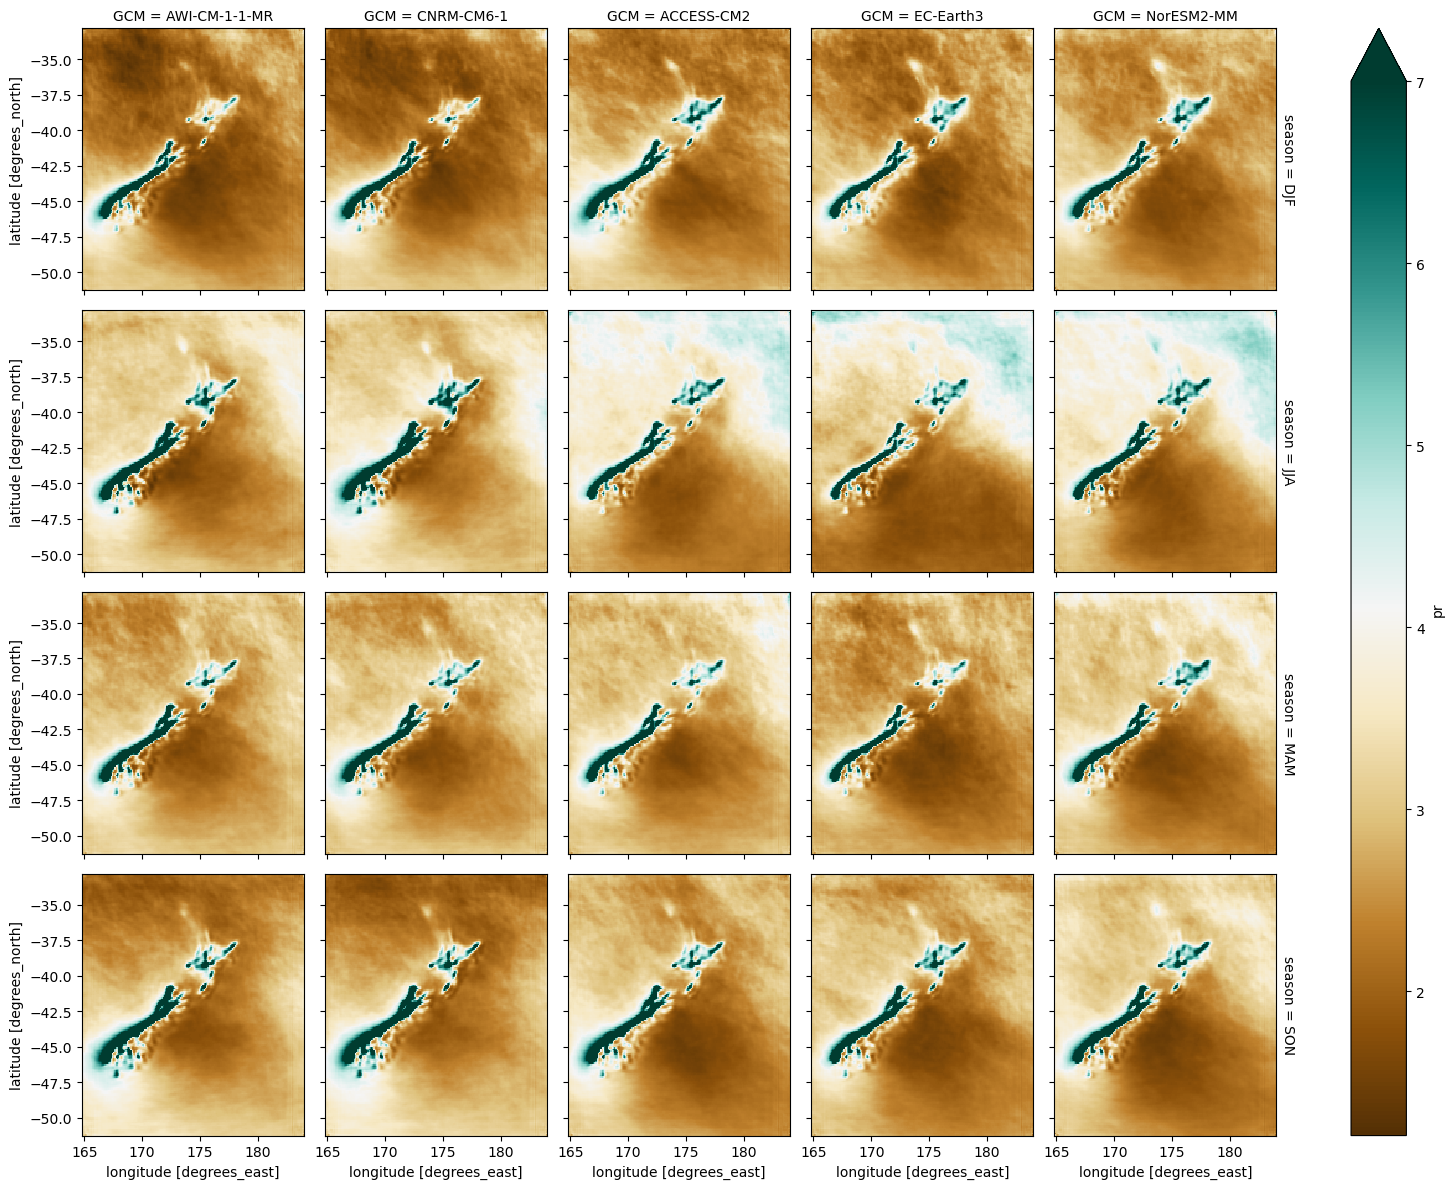

In [538]:
z1.plot(col ="GCM", row ="season", cmap ='BrBG', vmax =7)

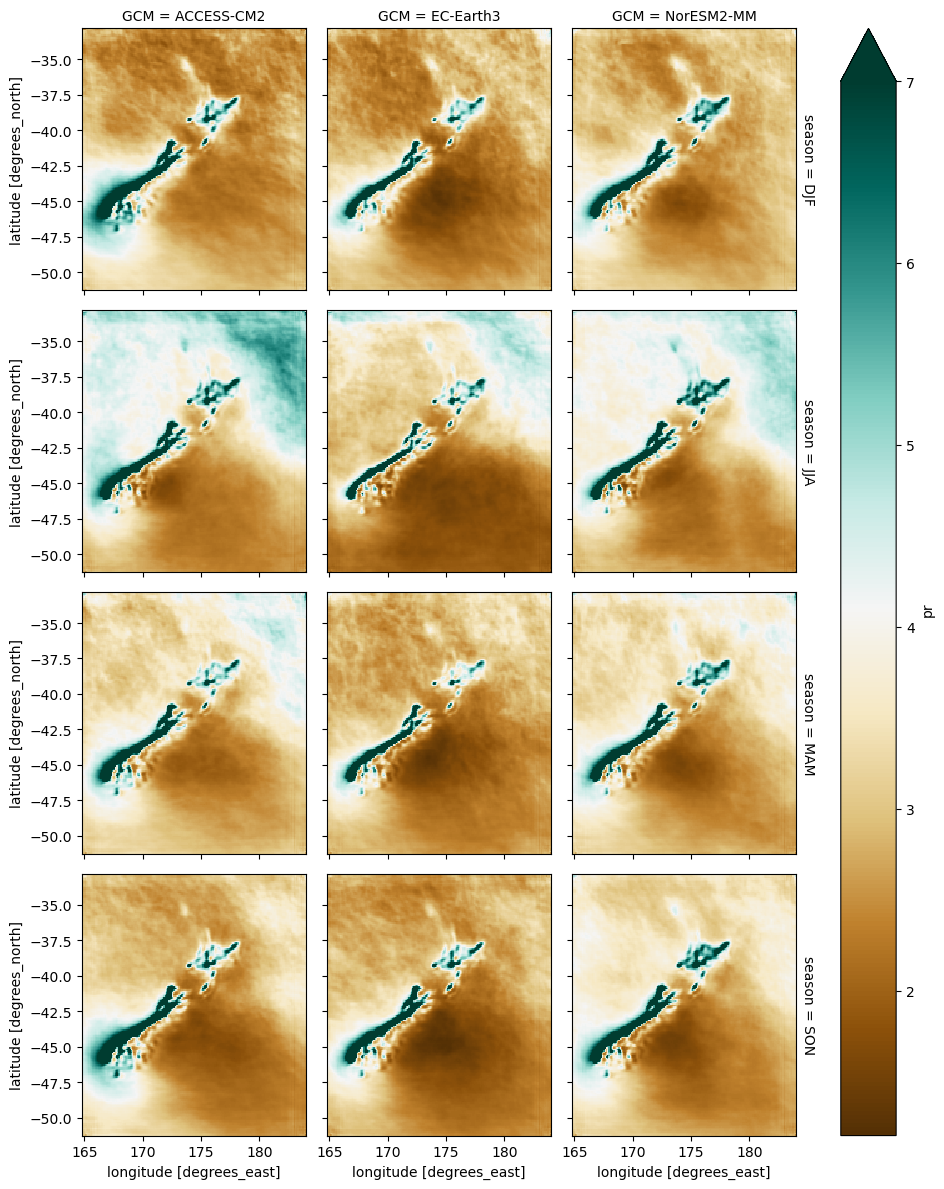

In [540]:
z2.plot(col ="GCM", row ="season", cmap ='BrBG', vmax =7)

In [67]:
I_model_txx_max, M_txx_max, S_txx_max, I_trend_A_txx_max, I_trend_C_txx_max, I_raw_A_txx_max, I_raw_C_txx_max,fitted_txx_max = compute_decomposition_decadal(t_dset.where(static_fields.orog>0, np.nan).mean(["lat","lon"]),
                                                                                              t_dset_le.where(static_fields.orog>0, np.nan).mean(["lat","lon"]), varname = "TXX_MME", dim ="year", degree =2, varname_iv = "TXX_IV")
I_model_txx_regional_max, M_txx_regional_max, S_txx_regional_max, I_trend_A_txx_regional_max, I_trend_C_txx_regional_max, I_raw_A_txx_regional_max, I_raw_C_txx_regional_max,fitted_T_txx_regional_max = compute_decomposition_decadal(t_dset,
                                                                                              t_dset_le, varname = "TXX_MME", dim ="year", degree =2, varname_iv = "TXX_IV")

passed
passed
here
passed
passed
here


NameError: name 'I_raw_A_r' is not defined

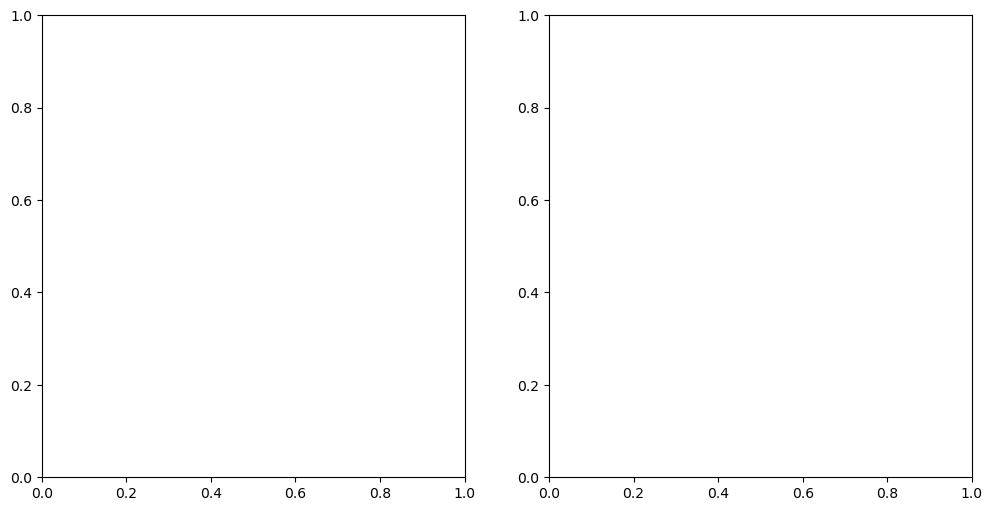

In [76]:
fig, ax = plt.subplots(1,2, figsize = (12,6))


#I_trend_A_r.where(static_fields.orog>0, np.nan).mean(["lat","lon"]).dropna("year").sel(year = slice(2025, 2100)).plot(color ='b', ls ='--', ax = ax[0])
#I_trend_C_r.where(static_fields.orog>0, np.nan).mean(["lat","lon"]).dropna("year").sel(year = slice(2025, 2100)).plot(color ='g', ls ='--', ax =ax[0])
I_raw_A_r.where(static_fields.orog>0, np.nan).mean(["lat","lon"]).dropna("year").sel(year = slice(2025, 2100)).plot(color ='b', ax = ax[0])
#I_raw_C_r.where(static_fields.orog>0, np.nan).mean(["lat","lon"]).dropna("year").sel(year = slice(2025, 2100)).plot(color ='g', ax=ax[0])
#(1/2 * (I_raw_C_r +I_raw_A_r)) .where(static_fields.orog>0, np.nan).mean(["lat","lon"]).dropna("year").sel(year = slice(2025, 2100)).plot(color ='k', ax=ax[0], ls ='-', lw =5)

#I_trend_A.where(static_fields.orog>0, np.nan).mean(["lat","lon"]).dropna("year").sel(year = slice(2025, 2100)).plot(color ='b', ls ='--', ax = ax[1], label ='Trend ACCESS-ESM1-5 ($\sigma_{A[t]}$))' )
#I_trend_C.where(static_fields.orog>0, np.nan).mean(["lat","lon"]).dropna("year").sel(year = slice(2025, 2100)).plot(color ='g', ls ='--', ax =ax[1], label ='Trend CanESM5 ($\sigma_{C[t]}$))' )
I_raw_A.where(static_fields.orog>0, np.nan).mean(["lat","lon"]).dropna("year").sel(year = slice(2025, 2100)).plot(color ='b', ax = ax[1], label = 'ACCESS-ESM1-5 ($\sigma_A$))')
#I_raw_C.where(static_fields.orog>0, np.nan).mean(["lat","lon"]).dropna("year").sel(year = slice(2025, 2100)).plot(color ='g', ax=ax[1], label = 'CanESM5 ($\sigma_C$))')
#(1/2 * (I_raw_C +I_raw_A)) .where(static_fields.orog>0, np.nan).mean(["lat","lon"]).dropna("year").sel(year = slice(2025, 2100)).plot(color ='k', ax=ax[1], ls ='-', lw =5, label ='IV Variance 1/2($\sigma_A +\sigma_C$))')
ax[0].axhline(I_model_r.where(static_fields.orog>0, np.nan).mean(["lat","lon"]), color ='k', ls ='--')
ax[1].axhline(I_model.where(static_fields.orog>0, np.nan).mean(["lat","lon"]), color ='k', label ='Static IV \n(Hawkins & Sutton., 2009)', ls ='--')
ax[1].legend(bbox_to_anchor = (0.65, -0.1), fontsize =12, ncol =2
            )
ax[0].set_xlabel('Year', weight ='bold', fontsize=13)
ax[1].set_xlabel('Year', weight ='bold', fontsize =13)
ax[0].tick_params(labelsize =12)
ax[1].tick_params(labelsize =12)
ax[1].set_ylabel('TXx Variance $(\degree C)^2$', fontsize =13, weight='bold')
ax[0].set_ylabel('RX1Day Variance $(\%)^2$', fontsize =13, weight='bold')
ax[0].set_title('RX1Day Variance', fontsize =15, weight ='bold')
ax[1].set_title('TXx Variance', fontsize =15, weight ='bold')
#
#fig.savefig('/nesi/project/niwa00018/ML_downscaling_CCAM/AI_large_ensemble/figures/Assumptions_for_Internal_Variability_1year.png', dpi =500, bbox_inches ='tight')
#fig.savefig('/nesi/project/niwa00018/ML_downscaling_CCAM/AI_large_ensemble/figures/Assumptions_for_Internal_Variability_1year.pdf', dpi =500, bbox_inches ='tight')
#ax[0].grid('on')

In [68]:
I_model_rx1day_max, M_rx1day_max, S_rx1day_max, I_trend_A_rx1day_max, I_trend_C_rx1day_max, I_raw_A_rx1day_max, I_raw_C_rx1day_max,fitted_rx1day_max = compute_decomposition_decadal(pr_dset.where(static_fields.orog>0, np.nan).mean(["lat","lon"]),
                                                                                              pr_dset_le.where(static_fields.orog>0, np.nan).mean(["lat","lon"]), varname = "Rx1day_MME", dim ="year", degree =2, varname_iv = "RX1Day_IV")
I_model_rx1day_regional_max, M_rx1day_regional_max, S_rx1day_regional_max, I_trend_A_rx1day_regional_max, I_trend_C_rx1day_regional_max, I_raw_A_rx1day_regional_max, I_raw_C_rx1day_regional_max,fitted_T_rx1day_regional_max = compute_decomposition_decadal(pr_dset,
                                                                                              pr_dset_le, varname = "Rx1day_MME", dim ="year", degree =2, varname_iv = "RX1Day_IV")

passed
passed
here
passed
passed
here


In [71]:
fitted_rx1day_max

<xarray.DataArray (year: 96, GCM: 20, ssp: 4)>
array([[[11.77473596, 14.29833882, 14.19562314, 15.0991699 ],
        [ 5.07883255,  6.53235543, 12.0254246 , 12.24006551],
        [15.16082277,  9.06764764, 11.8992362 , 10.79732882],
        ...,
        [10.53341534, 13.77995458, 12.30194966, 15.4819312 ],
        [ 7.14152111,  5.00876446,  6.2246819 ,  1.92731831],
        [10.43268334, 16.92675345, 13.10402319, 13.24584863]],

       [[11.96202906, 14.28400514, 14.03152919, 15.00750889],
        [ 6.05145801,  7.16157251, 12.23108177, 12.66267597],
        [15.4281816 ,  9.47521225, 12.38053702, 11.24214589],
        ...,
        [10.60034219, 14.06319163, 12.35831833, 15.41125638],
        [ 7.50844403,  5.36181892,  6.63667164,  2.40743518],
        [10.6643154 , 16.76812773, 13.45846844, 13.15435581]],

       [[12.14556328, 14.27296329, 13.87381981, 14.92440847],
        [ 7.00640513,  7.78580075, 12.44147115, 13.0859259 ],
        [15.69056759,  9.87906458, 12.85253278, 11.68169807],
        ...,
...
        ...,
        [23.44409196, 18.46081113, 23.02021779, 25.32371454],
        [11.30437669, 20.48645154, 27.7425593 , 31.02742933],
        [24.54919833, 24.84288465, 25.86882049, 30.47779267]],

       [[12.95027244, 27.33951893, 26.6777138 , 43.90136831],
        [19.23365526, 43.87256121, 52.04173198, 54.76054874],
        [18.55624133, 31.1523596 , 16.46909247, 29.59733095],
        ...,
        [23.65637706, 18.2731745 , 23.19562954, 25.60987757],
        [11.01997405, 20.46219344, 27.7893932 , 31.16948624],
        [24.61941155, 25.17704856, 25.7841655 , 30.94588195]],

       [[12.78423189, 27.63461635, 27.1137687 , 44.61440264],
        [18.54451792, 44.03282777, 52.69221783, 55.24326888],
        [18.3561526 , 31.2109702 , 16.07571757, 29.54724905],
        ...,
        [23.87022515, 18.08047472, 23.37232133, 25.89987758],
        [10.72856791, 20.43387821, 27.8323007 , 31.3079081 ],
        [24.68788908, 25.51651128, 25.69478901, 31.41998824]]])
Coordinates:
  * year     (year) int64 2005 2006 2007 2008 2009 ... 2096 2097 2098 2099 2100
  * GCM      (GCM) object 'CNRM-CM6-1' 'UKESM1-0-LL' ... 'MPI-ESM1-2-HR'
  * ssp      (ssp) object 'ssp126' 'ssp245' 'ssp370' 'ssp585'

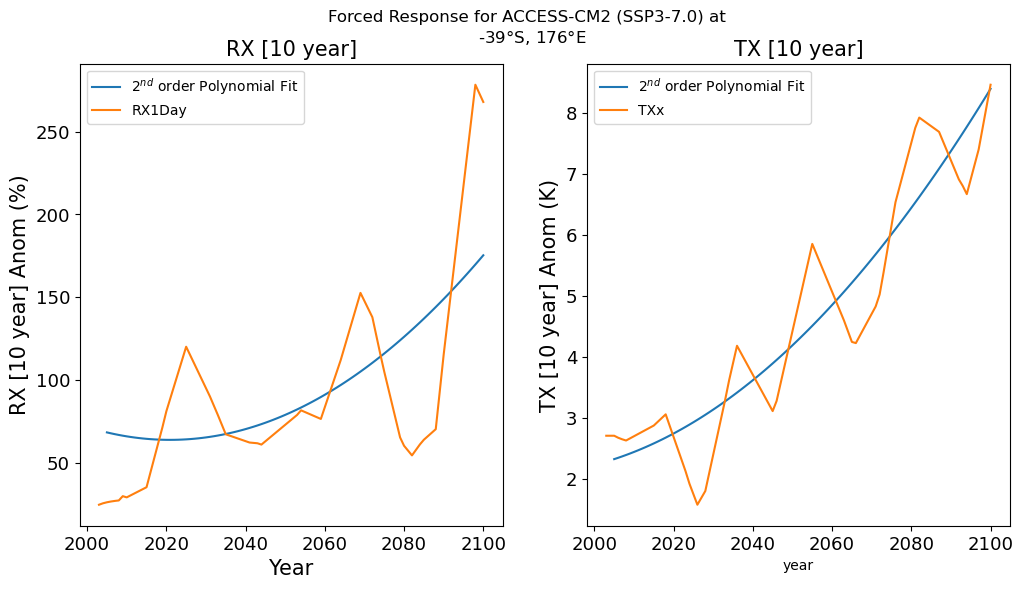

In [75]:
fig, ax = plt.subplots(1,2 , figsize = (12, 6), sharex=True)
fitted_T_rx1day_regional_max.sel(GCM ="ACCESS-CM2", ssp="ssp370").interp(lat =-39, lon =176).plot(ax = ax[0], label ='$2^{nd}$ order Polynomial Fit' )
pr_dset.sel(GCM ="ACCESS-CM2", ssp="ssp370").interp(lat =-39, lon =176).Rx1day_MME.rolling(year =10, min_periods =5).max().rolling(year =10, min_periods =5).mean().plot(ax = ax[0], label ='RX1Day')

fitted_T_txx_regional_max.sel(GCM ="ACCESS-CM2", ssp="ssp370").interp(lat =-39, lon =176).plot(ax = ax[1], label ='$2^{nd}$ order Polynomial Fit' )
t_dset.TXX_MME.sel(GCM ="ACCESS-CM2", ssp="ssp370").interp(lat =-39, lon =176).rolling(year =10, min_periods =5).max().rolling(year =10, min_periods =5).mean().plot(ax=ax[1], label ='TXx')
ax[1].set_ylabel('TX [10 year] Anom (K)', fontsize =15,)
ax[0].set_ylabel('RX [10 year] Anom (%)', fontsize = 15)
ax[0].tick_params(labelsize =13)
ax[1].tick_params(labelsize =13)
ax[0].set_xlabel('Year', fontsize =15)
ax[0].legend(fontsize =10)
ax[1].legend(fontsize =10)
ax[0].set_title('RX [10 year]', fontsize =15)
ax[1].set_title('TX [10 year]', fontsize =15)
fig.suptitle('Forced Response for ACCESS-CM2 (SSP3-7.0) at \n -39$\degree$S, 176$\degree$E', x= 0.5, y =0.97)
fig.savefig(r'/nesi/project/niwa00018/ML_downscaling_CCAM/AI_large_ensemble/figures/illustration_of_forced_response_10year_extremes_v190525.png', dpi =500, bbox_inches ='tight')

In [85]:
df_test = xr.open_dataset(r'/nesi/project/niwa00018/ML_downscaling_CCAM/A-Robust-Generative-Adversarial-Network-Approach-for-Climate-Downscaling/data/train/predictor_ACCESS-CM2_hist.nc')


In [87]:
df_test.lat.values

array([-59.38, -57.88, -56.38, -54.88, -53.38, -51.88, -50.38, -48.88,
       -47.38, -45.88, -44.38, -42.88, -41.38, -39.88, -38.38, -36.88,
       -35.38, -33.88, -32.38, -30.88, -29.38, -27.88, -26.38])

In [88]:
df_test.lon.values

array([150.6, 152.1, 153.6, 155.1, 156.6, 158.1, 159.6, 161.1, 162.6,
       164.1, 165.6, 167.1, 168.6, 170.1, 171.6, 173.1, 174.6, 176.1,
       177.6, 179.1, 180.6, 182.1, 183.6, 185.1, 186.6, 188.1])

In [89]:
df_test

<xarray.Dataset>
Dimensions:  (lon: 26, lat: 23, lev: 3, time: 20075)
Coordinates:
  * lon      (lon) float64 150.6 152.1 153.6 155.1 ... 183.6 185.1 186.6 188.1
  * lat      (lat) float64 -59.38 -57.88 -56.38 -54.88 ... -29.38 -27.88 -26.38
  * lev      (lev) float32 850.0 500.0 250.0
  * time     (time) object 1960-01-01 00:00:00 ... 2014-12-31 00:00:00
Data variables: (12/15)
    u_850    (time, lat, lon) float32 ...
    u_500    (time, lat, lon) float32 ...
    u_250    (time, lat, lon) float32 ...
    v_850    (time, lat, lon) float32 ...
    v_500    (time, lat, lon) float32 ...
    v_250    (time, lat, lon) float32 ...
    ...       ...
    q_850    (time, lat, lon) float32 ...
    q_500    (time, lat, lon) float32 ...
    q_250    (time, lat, lon) float32 ...
    t_850    (time, lat, lon) float32 ...
    t_500    (time, lat, lon) float32 ...
    t_250    (time, lat, lon) float32 ...
Attributes: (12/259)
    CDI:                  Climate Data Interface version 1.9.5 (http://mpimet...
    history:              Thu Dec 07 03:31:52 2023: cdo -L -selname,ua,va,wa,...
    source:               CSIRO conformal-cubic model. Input file: ccam_12km....
    Conventions:          CF-1.7
    title:                CCAM simulation data
    contact:              ccam@csiro.au
    ...                   ...
    ateb_minsnowden:      100.0
    ateb_ncyits:          6
    ateb_nfgits:          3
    ateb_nrefl:           3
    ateb_refheight:       0.6
    ateb_resmeth:         1

passed
passed
here
passed
passed
here


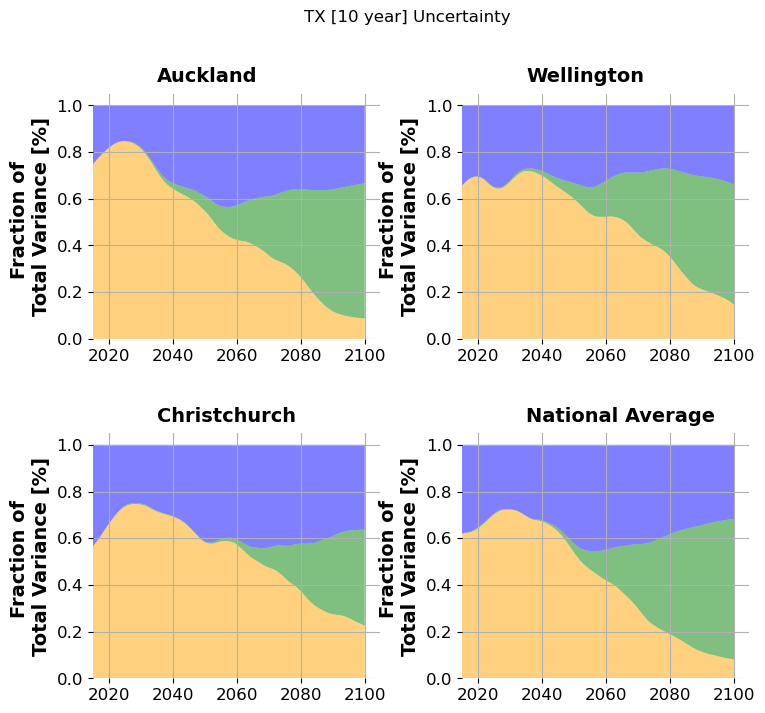

In [77]:

# Set up figure and grid
fig = plt.figure(figsize=(18, 12))
gs = GridSpec(9, 12, wspace=2, hspace=5)

ax1 = fig.add_subplot(gs[0:3, 0:3])
ax11 = fig.add_subplot(gs[0:3, 3:6])

ax2 = fig.add_subplot(gs[3:6 ,0:3])
ax22 = fig.add_subplot(gs[3:6, 3:6])
# Plot insets for each location
ax_tt = [ax1, ax11, ax2]
for i, (region, (lat, lon)) in enumerate(regions.items()):
     ax_t = ax_tt[i]
     plot_fractional_uncertainty(M_txx_regional_max, S_txx_regional_max, 1/2* (I_raw_C_txx_regional_max + I_raw_A_txx_regional_max),
                                 lat, lon, ax = ax_t, region = region)   
plot_fractional_uncertainty(M_txx_max, S_txx_max, 1/2* (I_raw_C_txx_max + I_raw_A_txx_max),
                                 None, None, ax = ax22, region = "National Average")    
fig.suptitle('TX [10 year] Uncertainty', x = 0.3, y =0.95)
fig.savefig(r'/nesi/project/niwa00018/ML_downscaling_CCAM/AI_large_ensemble/figures/Hawkins_Sutton/tx_10year_Uncertainty_v190525.png', dpi =500, bbox_inches ='tight')


In [87]:
merged_dset

<xarray.Dataset>
Dimensions:                 (GCM_variant: 40, season: 4, lat: 172, lon: 179, year: 151)
Coordinates:
  * GCM_variant             (GCM_variant) object 'ACCESS-ESM1-5_r10i1p1f1' .....
    height                  float64 2.0
    height_2                float64 10.0
  * season                  (season) object 'DJF' 'JJA' 'MAM' 'SON'
  * year                    (year) int64 1950 1951 1952 1953 ... 2098 2099 2100
  * lat                     (lat) float32 -51.21 -51.11 -51.0 ... -32.97 -32.86
  * lon                     (lon) float32 164.9 165.0 165.1 ... 183.9 184.0
Data variables:
    tasmax_seasonal_future  (GCM_variant, season, lat, lon) float32 286.0 ......
    pr_seasonal_future      (GCM_variant, season, lat, lon) float32 4.153e-05...
    tasmax_seasonal_hist    (GCM_variant, season, lat, lon) float32 284.7 ......
    pr_seasonal_hist        (GCM_variant, season, lat, lon) float32 3.884e-05...
    TXx                     (GCM_variant, year, lat, lon) float32 286.7 ... 3...
    Rx1day                  (GCM_variant, year, lat, lon) float32 0.000301 .....
    TXX_IV                  (GCM_variant, year, lat, lon) float32 -1.521 ... ...
    RX1Day_IV               (GCM_variant, year, lat, lon) float32 -8.89 ... 1...

In [97]:
dim = "year"
ens_low_res_raw_mean= merged_dset['TXX_IV'].rolling({dim: 10}, min_periods =6).max().rolling({dim: 10}, min_periods =6).mean().mean("GCM_variant")
ens_raw_mean= t_dset_le.sel(GCM_variant = (t_dset_le.GCM == 'ACCESS-ESM1-5'))['TXX_IV'].rolling({dim: 10}, min_periods =6).max().rolling({dim: 10}, min_periods =6).mean().dropna(dim).mean("GCM_variant")
D_uncertainty = abs(ens_low_res_raw_mean - ens_raw_mean)**2


In [96]:
dim = "year"
ens_low_res_raw_mean= merged_dset['RX1Day_IV'].rolling({dim: 10}, min_periods =6).max().rolling({dim: 10}, min_periods =6).mean().mean("GCM_variant")
ens_raw_mean= pr_dset_le.sel(GCM_variant = (t_dset_le.GCM == 'ACCESS-ESM1-5'))['RX1Day_IV'].rolling({dim: 10}, min_periods =6).max().rolling({dim: 10}, min_periods =6).mean().dropna(dim).mean("GCM_variant")
D_uncertainty_pr = abs(ens_low_res_raw_mean - ens_raw_mean)**2


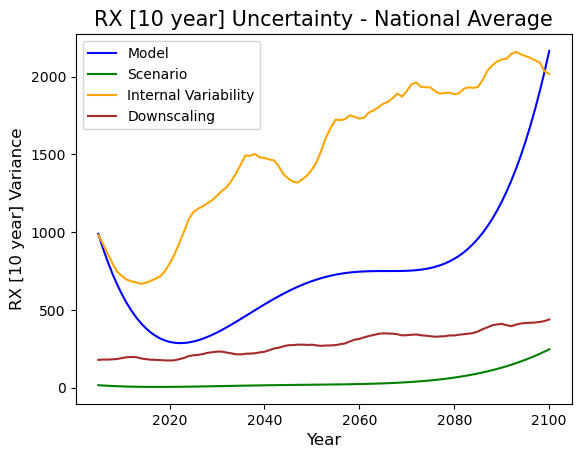

In [109]:
fig, ax = plt.subplots()
M_rx1day_regional_max.where(static_fields.orog>0, np.nan).mean(["lat","lon"]).plot(ax = ax, color ='blue', label='Model')
S_rx1day_regional_max.where(static_fields.orog>0, np.nan).mean(["lat","lon"]).plot(ax=ax, color ='green', label ='Scenario')
I_raw_A_rx1day_regional_max.where(static_fields.orog>0, np.nan).mean(["lat","lon"]).plot(ax = ax, label ='Internal Variability', color ='orange')
D_uncertainty_pr.where(static_fields.orog>0, np.nan).mean(["lat","lon"]).plot(label ='Downscaling', color='brown')
ax.legend()
ax.set_title('RX [10 year] Uncertainty - National Average', fontsize =15)
ax.set_ylabel('RX [10 year] Variance', fontsize =12)
ax.set_xlabel('Year', fontsize =12)

fig.savefig(r'/nesi/project/niwa00018/ML_downscaling_CCAM/AI_large_ensemble/figures/Uncertainty_Decomposition_National_Average.png', dpi =500, bbox_inches ='tight')
#plt.yscale('log')

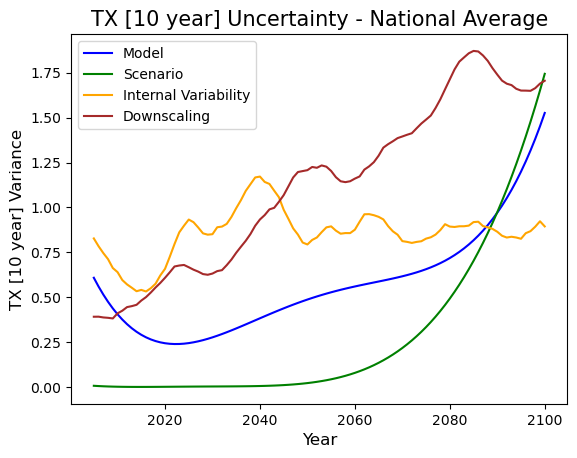

In [110]:
fig, ax = plt.subplots()
M_txx_regional_max.where(static_fields.orog>0, np.nan).mean(["lat","lon"]).plot(ax = ax, color ='blue', label='Model')
S_txx_regional_max.where(static_fields.orog>0, np.nan).mean(["lat","lon"]).plot(ax=ax, color ='green', label ='Scenario')
I_raw_A_txx_regional_max.where(static_fields.orog>0, np.nan).mean(["lat","lon"]).plot(ax = ax, label ='Internal Variability', color ='orange')
D_uncertainty.where(static_fields.orog>0, np.nan).mean(["lat","lon"]).plot(label ='Downscaling', color='brown')
ax.legend()
ax.set_title('TX [10 year] Uncertainty - National Average', fontsize =15)
ax.set_ylabel('TX [10 year] Variance', fontsize =12)
ax.set_xlabel('Year', fontsize =12)

fig.savefig(r'/nesi/project/niwa00018/ML_downscaling_CCAM/AI_large_ensemble/figures/Uncertainty_Decomposition_National_Average_TX_10YEAR.png', dpi =500, bbox_inches ='tight')




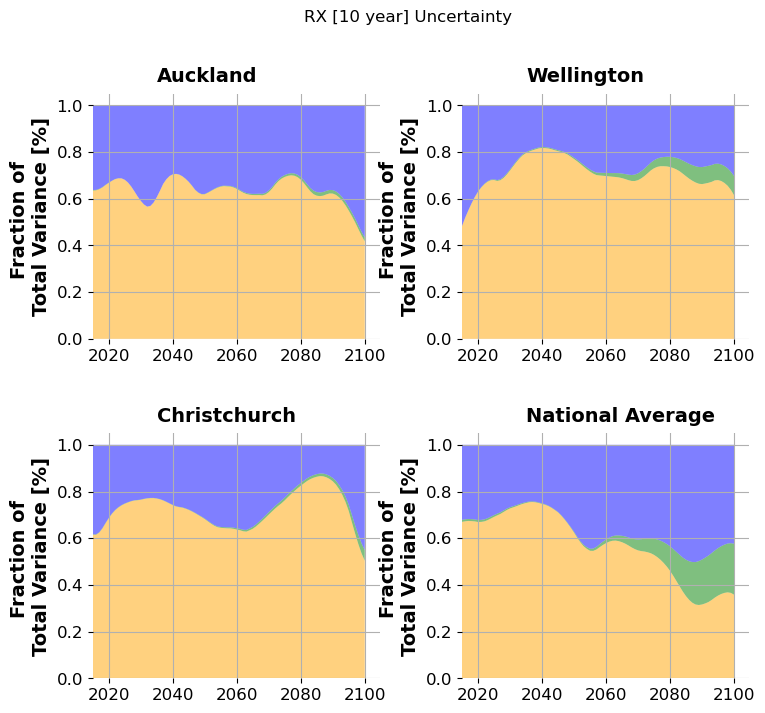

In [78]:

# Set up figure and grid
fig = plt.figure(figsize=(18, 12))
gs = GridSpec(9, 12, wspace=2, hspace=5)

ax1 = fig.add_subplot(gs[0:3, 0:3])
ax11 = fig.add_subplot(gs[0:3, 3:6])

ax2 = fig.add_subplot(gs[3:6 ,0:3])
ax22 = fig.add_subplot(gs[3:6, 3:6])
# Plot insets for each location
ax_tt = [ax1, ax11, ax2]
for i, (region, (lat, lon)) in enumerate(regions.items()):
     ax_t = ax_tt[i]
     plot_fractional_uncertainty(M_rx1day_regional_max, S_rx1day_regional_max, 1/2* (I_raw_C_rx1day_regional_max + I_raw_A_rx1day_regional_max),
                                 lat, lon, ax = ax_t, region = region)   
plot_fractional_uncertainty(M_rx1day_max, S_rx1day_max, 1/2* (I_raw_C_rx1day_max + I_raw_A_rx1day_max),
                                 None, None, ax = ax22, region = "National Average")    
fig.suptitle('RX [10 year] Uncertainty', x = 0.3, y =0.95)
fig.savefig(r'/nesi/project/niwa00018/ML_downscaling_CCAM/AI_large_ensemble/figures/Hawkins_Sutton/RX_10year_Uncertainty_v190525.png', dpi =500, bbox_inches ='tight')


In [ ]:

hillshade_dset.hillshade.plot(ax=ax_map, transform=ccrs.PlateCarree(), cmap='Greys_r', alpha=0.5, levels=10, zorder=1, add_colorbar=False)
hillshade_dset.topo.plot(ax=ax_map, transform=ccrs.PlateCarree(), cmap=custom_cmap, alpha=0.3, levels=10, zorder=2, add_colorbar=False, vmax=1500)
ax_map.coastlines('10m')#add_feature(cfeature.COASTLINE.with_scale('10m'), linewidth=1)
#ax_map.add_feature(cfeature.BORDERS, linestyle=':')
#ax_map.set_title("Locations in New Zealand")

i =0
I = 1/2* (I_raw_C_djf_ann_regional + I_raw_A_djf_ann_regional)
I = I.rolling(year =10, min_periods =1).mean()
T = S_djf_ann_regional +M_djf_ann_regional + I
S_f  = S_djf_ann_regional/T
M_f = M_djf_ann_regional/T
I_f = I/T



i =0
I_djf_ann = 1/2* (I_raw_C_djf_ann + I_raw_A_djf_ann)
I_djf_ann = I_djf_ann.rolling(year =10, min_periods =1).mean()
T_r1 = S_djf_ann + M_djf_ann +I_djf_ann
S_f1  = S_djf_ann/T_r1
M_f1 = M_r/T_r1
I_f1 = I_r/T_r1


ax1 = fig.add_subplot(gs[0:3, 0:3])
ax11 = fig.add_subplot(gs[0:3, 3:6])

ax2 = fig.add_subplot(gs[3:6 ,0:3])
ax22 = fig.add_subplot(gs[3:6, 3:6])


#ax3 = fig.add_subplot(gs[6:9, 0:3])
#ax33 = fig.add_subplot(gs[6:9 ,3:6])

#ax4 = fig.add_subplot(gs[9:12, 0:3])
#ax44 = fig.add_subplot(gs[9:12, 3:6])

ax_tt = [ax1, ax11, ax2]


#custom_cmap = LinearSegmentedColormap.from_list("custom_colormap", colors)


# Plot insets for each location
for i, (region, (lat, lon)) in enumerate(regions.items()):
    row, col = divmod(i, 2)

    # Temperature subplot
    ax_t = ax_tt[i]#fig.add_subplot(gs[row, col+1])
    ax_p = ax_pp[i]

    
    ax_t.stackplot(
        I_f.year,
        I_f.sel(lat =lat, lon =lon, method ='nearest'),
        S_f.sel(lat =lat, lon =lon, method ='nearest'),
        M_f.sel(lat =lat, lon =lon, method ='nearest'),
        labels=["Internal Variability", "Scenario Uncertainty","Model Uncertainty" ],
        colors=["orange", "green", "blue"] , alpha =0.5)

    ax_p.stackplot(
        I_f1.year,
        I_f1.sel(lat =lat, lon =lon, method ='nearest'),
        S_f1.sel(lat =lat, lon =lon, method ='nearest'),
        M_f1.sel(lat =lat, lon =lon, method ='nearest'),
        labels=["Internal Variability", "Scenario Uncertainty","Model Uncertainty" ],
        colors=["orange", "green", "blue"] , alpha =0.5)
    #ax_t.set_xlabel("Lead Time [years from 2015]", fontsize=12, fontweight='bold')
    ax_t.set_ylabel("Fraction of \nTotal Variance [%]", fontsize=14, fontweight='bold')
    #ax_t.text(lon-0.3, lat-0.45, region, transform =ccrs.PlateCarree(), fontsize =12, zorder =12, color ='k', weight ='bold')#, weight ='bold')
    #ax_t.scatter(lon, lat, transform =ccrs.PlateCarree(), s=150, color ='k', marker ='o', zorder=14)
    #ax_violin.set_xticks([])

    #ax_t.set_title(region, fontsize=12, weight ='bold')
    ax_t.grid('on')
    
    #ax_p.set_title(region, fontsize=12, weight ='bold')
    ax_p.grid('on')
    ax_p.set_xlim(2015, None)
    ax_t.set_xlim(2015, None)
    ax_t.set_xticks([2020, 2040, 2060, 2080, 2100])
    ax_t.set_xticklabels([2020, 2040, 2060, 2080, 2100], rotation =0)
    ax_p.set_xticklabels([2020, 2040, 2060, 2080, 2100], rotation =0)
    ax_p.set_xticks([2020, 2040, 2060, 2080, 2100])
    ax_map.text(lon-0.3, lat-0.45, region, transform =ccrs.PlateCarree(), fontsize =12, zorder =12, color ='k', weight ='bold')#, weight ='bold')
    ax_map.scatter(lon, lat, transform =ccrs.PlateCarree(), s=150, color ='k', marker ='o', zorder=14)
   
    # Convert map coordinates to figure coordinates
    #x_fig, y_fig = ax_map.transData.transform((lon, lat))
    #x_fig, y_fig = fig.transFigure.inverted().transform((x_fig, y_fig))
    
    #ax_violin.set_ylim(-50, 100)
    #offset_lat, offset_lon = offsets[region]
    ## Adjust position of violin plot
    #ax_violin.set_position([x_fig +offset_lon, y_fig +offset_lat, 0.2, 0.2])
    ax_t.tick_params(labelsize =12
                         )
    ax_p.tick_params(labelsize =12
                         )

    ax_p.grid('on')
    ax_t.grid('on')
    ax_p.set_frame_on(False)
    ax_t.set_frame_on(False)
    ax_t.text(2085, 1.1, region, fontsize =14, weight ='bold')
ax_map.set_frame_on(False)
    #ax_p.plot(t_dset.year.values, means2, color ='k', lw =1, zorder =6, marker ='o',ms =2)

    # Precipitation subplot (on twin y-axis)
    #ax_t.twinx()
    
    #ivar_P = I_var.interp(lat=lat, lon=lon, method='nearest')  # Update if separate I_var for P
    #mvar_P = M_var.interp(lat=lat, lon=lon, method='nearest')  # Update if separate M_var for P

    #ax_p.plot(t_dset.year.values, means_P, color='blue', lw=1.5, label='Precipitation')
    #ax_p.fill_between(t_dset.year.values, means_P - ivar_P, means_P + ivar_P, alpha=0.3, color='blue')
    #ax_p.set_ylabel("mm/day")
ax_t.set_xlabel("Year", fontsize =14, weight ='bold')
ax_p.set_xlabel("Year", fontsize =14, weight ='bold')
ax_p.legend(loc="lower right", fontsize =14, bbox_to_anchor = (0.75, -0.75))
ax_tt[0].text(2030, 1.2, 'TXx', fontsize =15, weight ='bold')
ax_pp[0].text(2030, 1.2, 'Rx1Day', fontsize =15, weight ='bold')
fig.savefig(r'/nesi/project/niwa00018/ML_downscaling_CCAM/AI_large_ensemble/figures/TXX_RX1dAY_hawkins_and_sutton.png', dpi =500, bbox_inches ='tight')

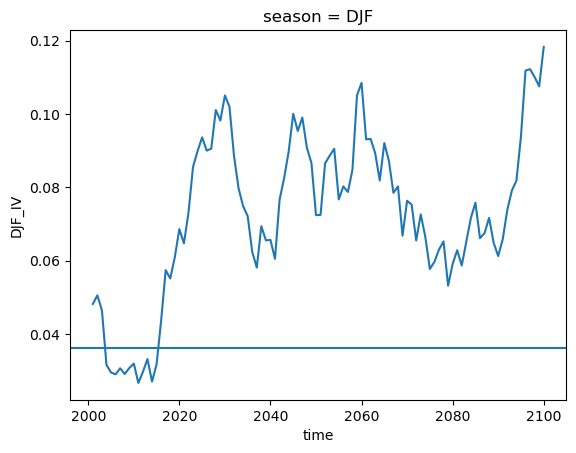

In [22]:
#M_djf_ann.plot()
#S_djf_ann.plot()
I_raw_A_djf_ann.plot()
plt.axhline(I_model_djf_ann)

In [ ]:
I_model_djf_ann_regional, M_djf_ann_regional, S_djf_ann_regional, I_trend_A_djf_ann_regional, I_trend_C_djf_ann_regional, I_raw_A_djf_ann_regional, I_raw_C_djf_ann_regional,fitted_T_djf_ann_regional = compute_decomposition_annual(t_dset.where(static_fields.orog>0, np.nan),
                                                                                              t_dset_le.where(static_fields.orog>0, np.nan), varname = "DJF_MME", dim ="time", degree =2, varname_iv = "TXX_IV")

In [ ]:
I_model, M, S, I_trend_A, I_trend_C, I_raw_A, I_raw_C,fitted_T = compute_decomposition_annual(t_dset, t_dset_le, varname = "TXX_MME", dim ="year", degree =2)

In [ ]:
I_model, M, S, I_trend_A, I_trend_C, I_raw_A, I_raw_C,fitted_T = compute_decomposition_v2(t_dset, t_dset_le, varname = "TXX_MME", dim ="year", degree =2)

In [ ]:
I_model_djf, M_djf, S_djf, I_trend_A_djf, I_trend_C_djf, I_raw_A_djf, I_raw_C_djf,fitted_T_djf = compute_decomposition(t_dset, t_dset_le, varname = "DJF_MME", dim ="time", degree =2, varname_iv ="DJF_IV")

In [ ]:
I_model_r, M_r, S_r, I_trend_A_r, I_trend_C_r, I_raw_A_r, I_raw_C_r, fitted_r = compute_decomposition(pr_dset, pr_dset_le, varname = "Rx1day_MME", dim ="year", degree =2, varname_iv = "RX1Day_IV")

In [ ]:
I_model_r, M_r, S_r, I_trend_A_r, I_trend_C_r, I_raw_A_r, I_raw_C_r, fitted_r = compute_decomposition_v2(pr_dset, pr_dset_le, varname = "Rx1day_MME", dim ="year", degree =2, varname_iv = "RX1Day_IV")

In [ ]:
I_model_r_djf, M_r_djf, S_r_djf, I_trend_A_r_djf, I_trend_C_r_djf, I_raw_A_r_djf, I_raw_C_r_djf, fitted_r_djf = compute_decomposition(pr_dset, pr_dset_le, varname = "DJF_MME_pr", dim ="time", degree =2, varname_iv = "DJF_IV_pr")